# Breast Cancer Detection: Data Preparation & Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


1. Business Understandig

2. Data Understandig

In [2]:
# Load the Wisconsin Diagnostic Breast Cancer dataset
df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')

print(f"Dataset shape: {df.shape}")
print(f"Total samples: {df.shape[0]}")
print(f"Total features: {df.shape[1]}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head(10))

Dataset shape: (569, 33)
Total samples: 569
Total features: 33

First 5 rows of the dataset:
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean 

In [3]:
# Check for columns with all NaN values
print("\nColumns with all NaN values:")
nan_cols = df.columns[df.isna().all()].tolist()
print(nan_cols if nan_cols else "None")


Columns with all NaN values:
['Unnamed: 32']


In [4]:
# CHECK FOR MISSING VALUES

missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Percentage': missing_percentage.values
})
missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_df) > 0:
    print("\nColumns with missing values:")
    print(missing_df)
else:
    print("\n✓ No missing values found in the dataset")


Columns with missing values:
         Column  Missing_Count  Percentage
32  Unnamed: 32            569       100.0


In [5]:
# DATA INFORMATION

print("\nData types:")
print(df.dtypes.value_counts())

print("\nDetailed information:")
df.info()


Data types:
float64    31
int64       1
object      1
Name: count, dtype: int64

Detailed information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 n


Diagnosis Distribution:
Benign (B): 357 samples (62.74%)
Malignant (M): 212 samples (37.26%)

✓ Target variable encoded: M=1 (Malignant), B=0 (Benign)


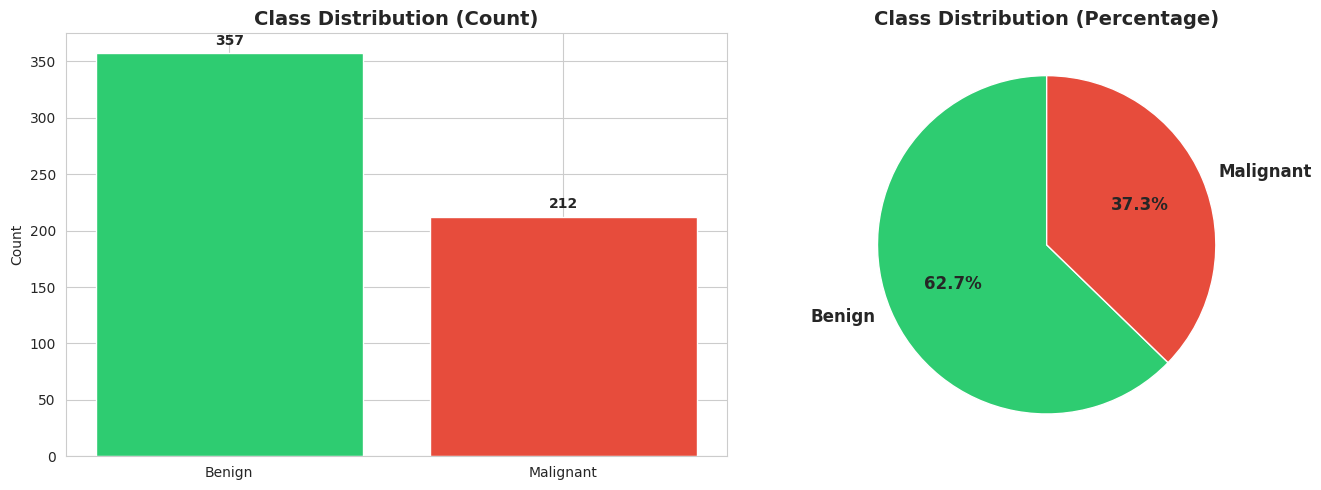

✓ Visualization saved as 'class_distribution.png'


In [6]:
# TARGET VARIABLE ANALYSIS

# Check diagnosis distribution
diagnosis_counts = df['diagnosis'].value_counts()
diagnosis_percentages = df['diagnosis'].value_counts(normalize=True) * 100

print("\nDiagnosis Distribution:")
print(f"Benign (B): {diagnosis_counts['B']} samples ({diagnosis_percentages['B']:.2f}%)")
print(f"Malignant (M): {diagnosis_counts['M']} samples ({diagnosis_percentages['M']:.2f}%)")

# Encode target variable: M (Malignant) = 1, B (Benign) = 0
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
print("\n✓ Target variable encoded: M=1 (Malignant), B=0 (Benign)")

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
diagnosis_labels = ['Benign', 'Malignant']
diagnosis_values = [diagnosis_counts['B'], diagnosis_counts['M']]
axes[0].bar(diagnosis_labels, diagnosis_values, color=['#2ecc71', '#e74c3c'])
axes[0].set_ylabel('Count')
axes[0].set_title('Class Distribution (Count)', fontsize=14, fontweight='bold')
for i, v in enumerate(diagnosis_values):
    axes[0].text(i, v + 5, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(diagnosis_values, labels=diagnosis_labels, autopct='%1.1f%%', 
            startangle=90, colors=colors, textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Visualization saved as 'class_distribution.png'")

In [7]:
# FEATURE CATEGORIZATION

# Categorize features as in the paper
mean_features = [col for col in df.columns if col.endswith('_mean')]
se_features = [col for col in df.columns if col.endswith('_se')]
worst_features = [col for col in df.columns if col.endswith('_worst')]

print(f"\nMean features (10): {len(mean_features)}")
print(mean_features)
print(f"\nStandard Error features (10): {len(se_features)}")
print(se_features)
print(f"\nWorst features (10): {len(worst_features)}")
print(worst_features)


Mean features (10): 10
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

Standard Error features (10): 10
['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']

Worst features (10): 10
['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [8]:
# STATISTICAL SUMMARY

# Separate features by diagnosis
benign = df[df['diagnosis'] == 0]
malignant = df[df['diagnosis'] == 1]

print("\nOverall Statistics:")
print(df.describe())

print("Statistics for Benign Cases:")
print(benign.describe())

print("Statistics for Malignant Cases:")
print(malignant.describe())


Overall Statistics:
                 id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813    


EXPLORATORY DATA ANALYSIS

[1/7] Creating distribution plots for mean features...


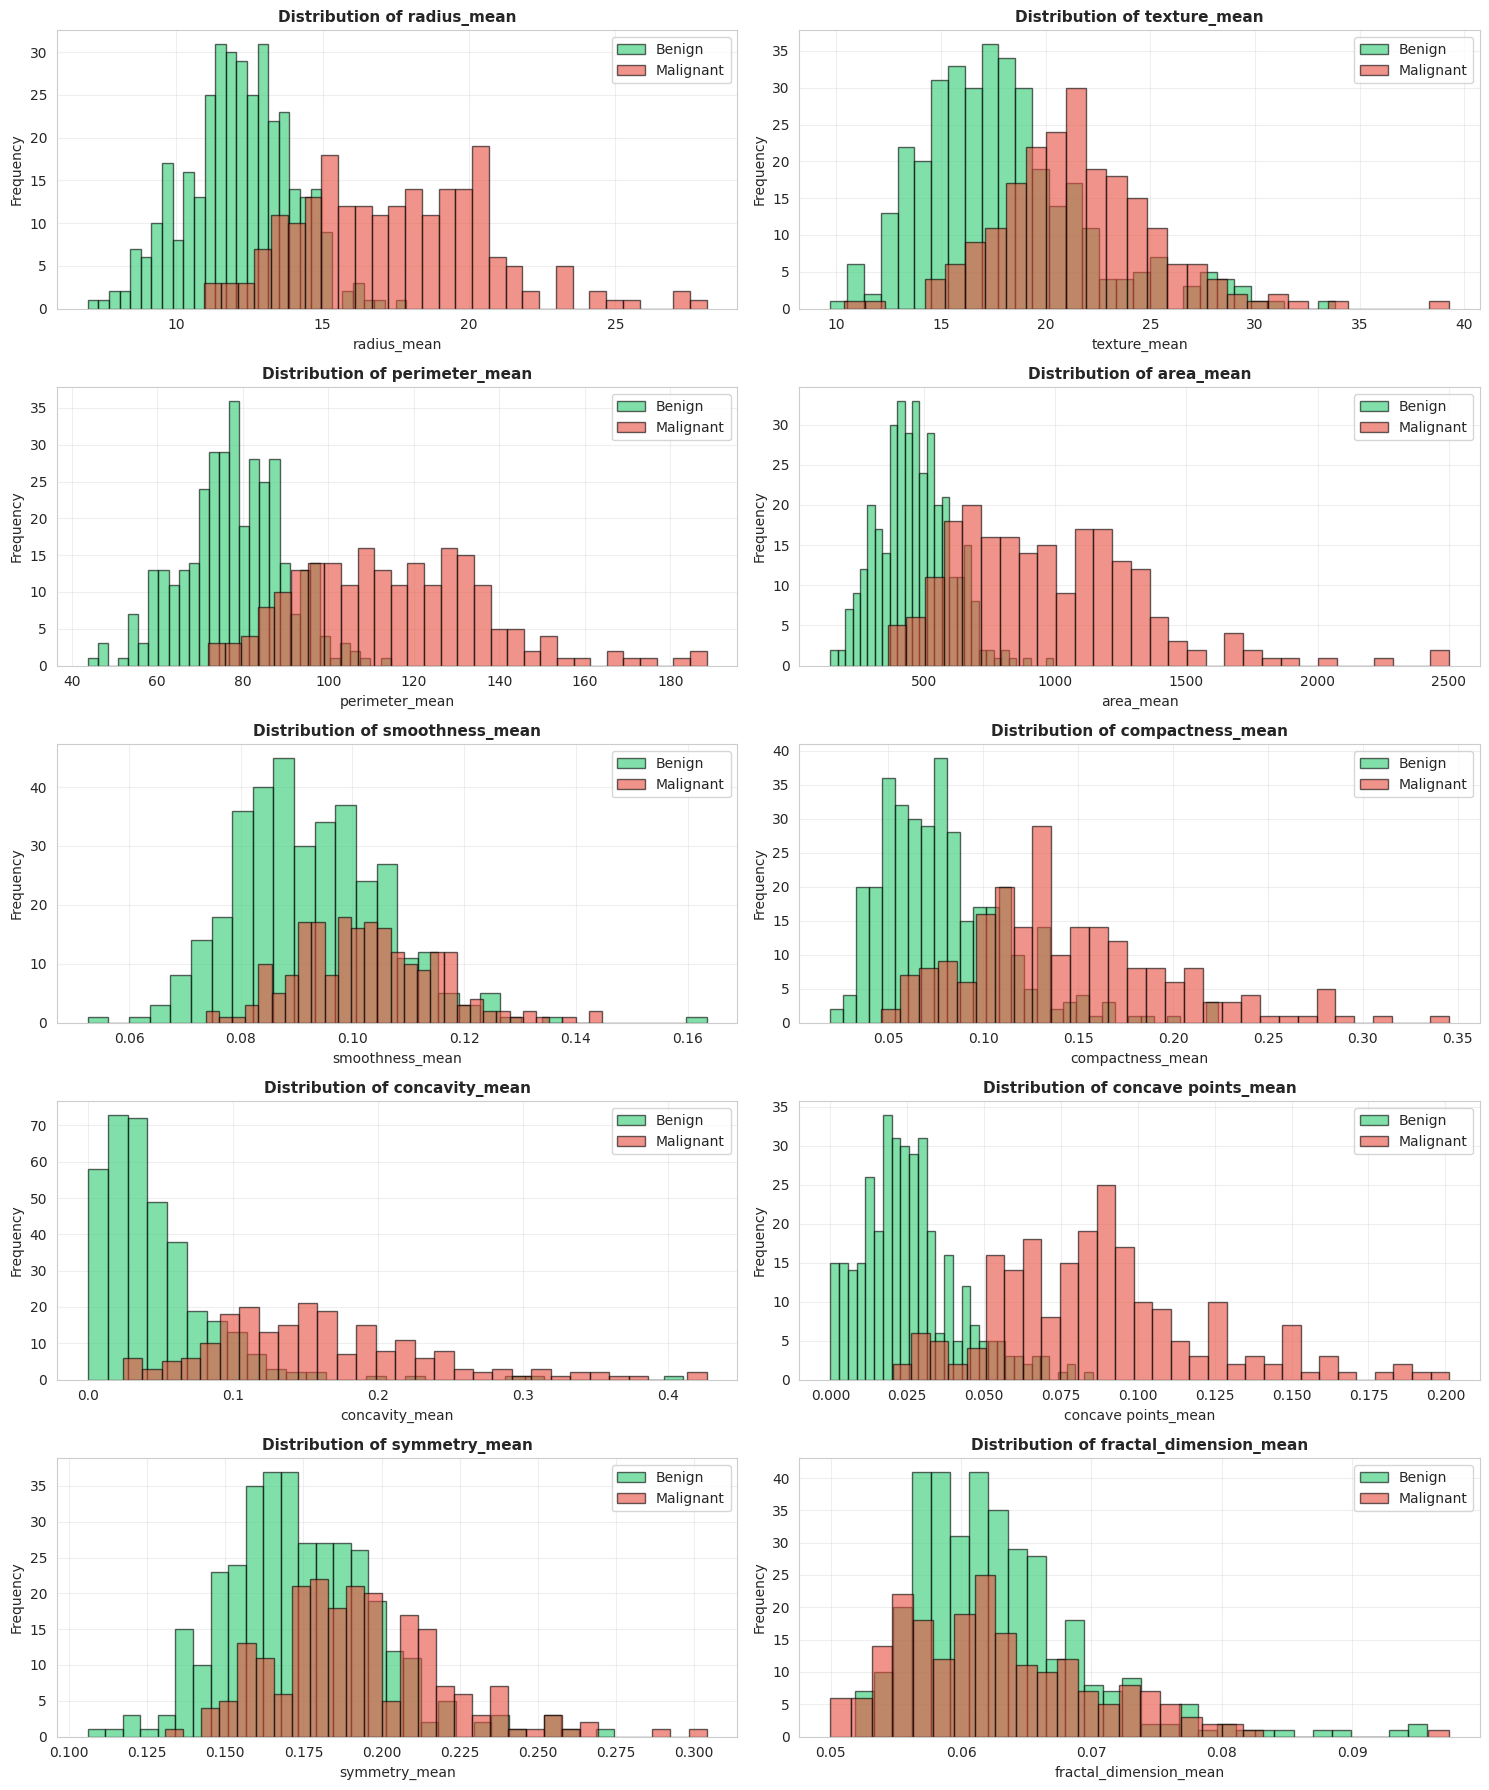

✓ Saved as 'mean_features_distribution.png'

[2/7] Creating box plots for mean features...


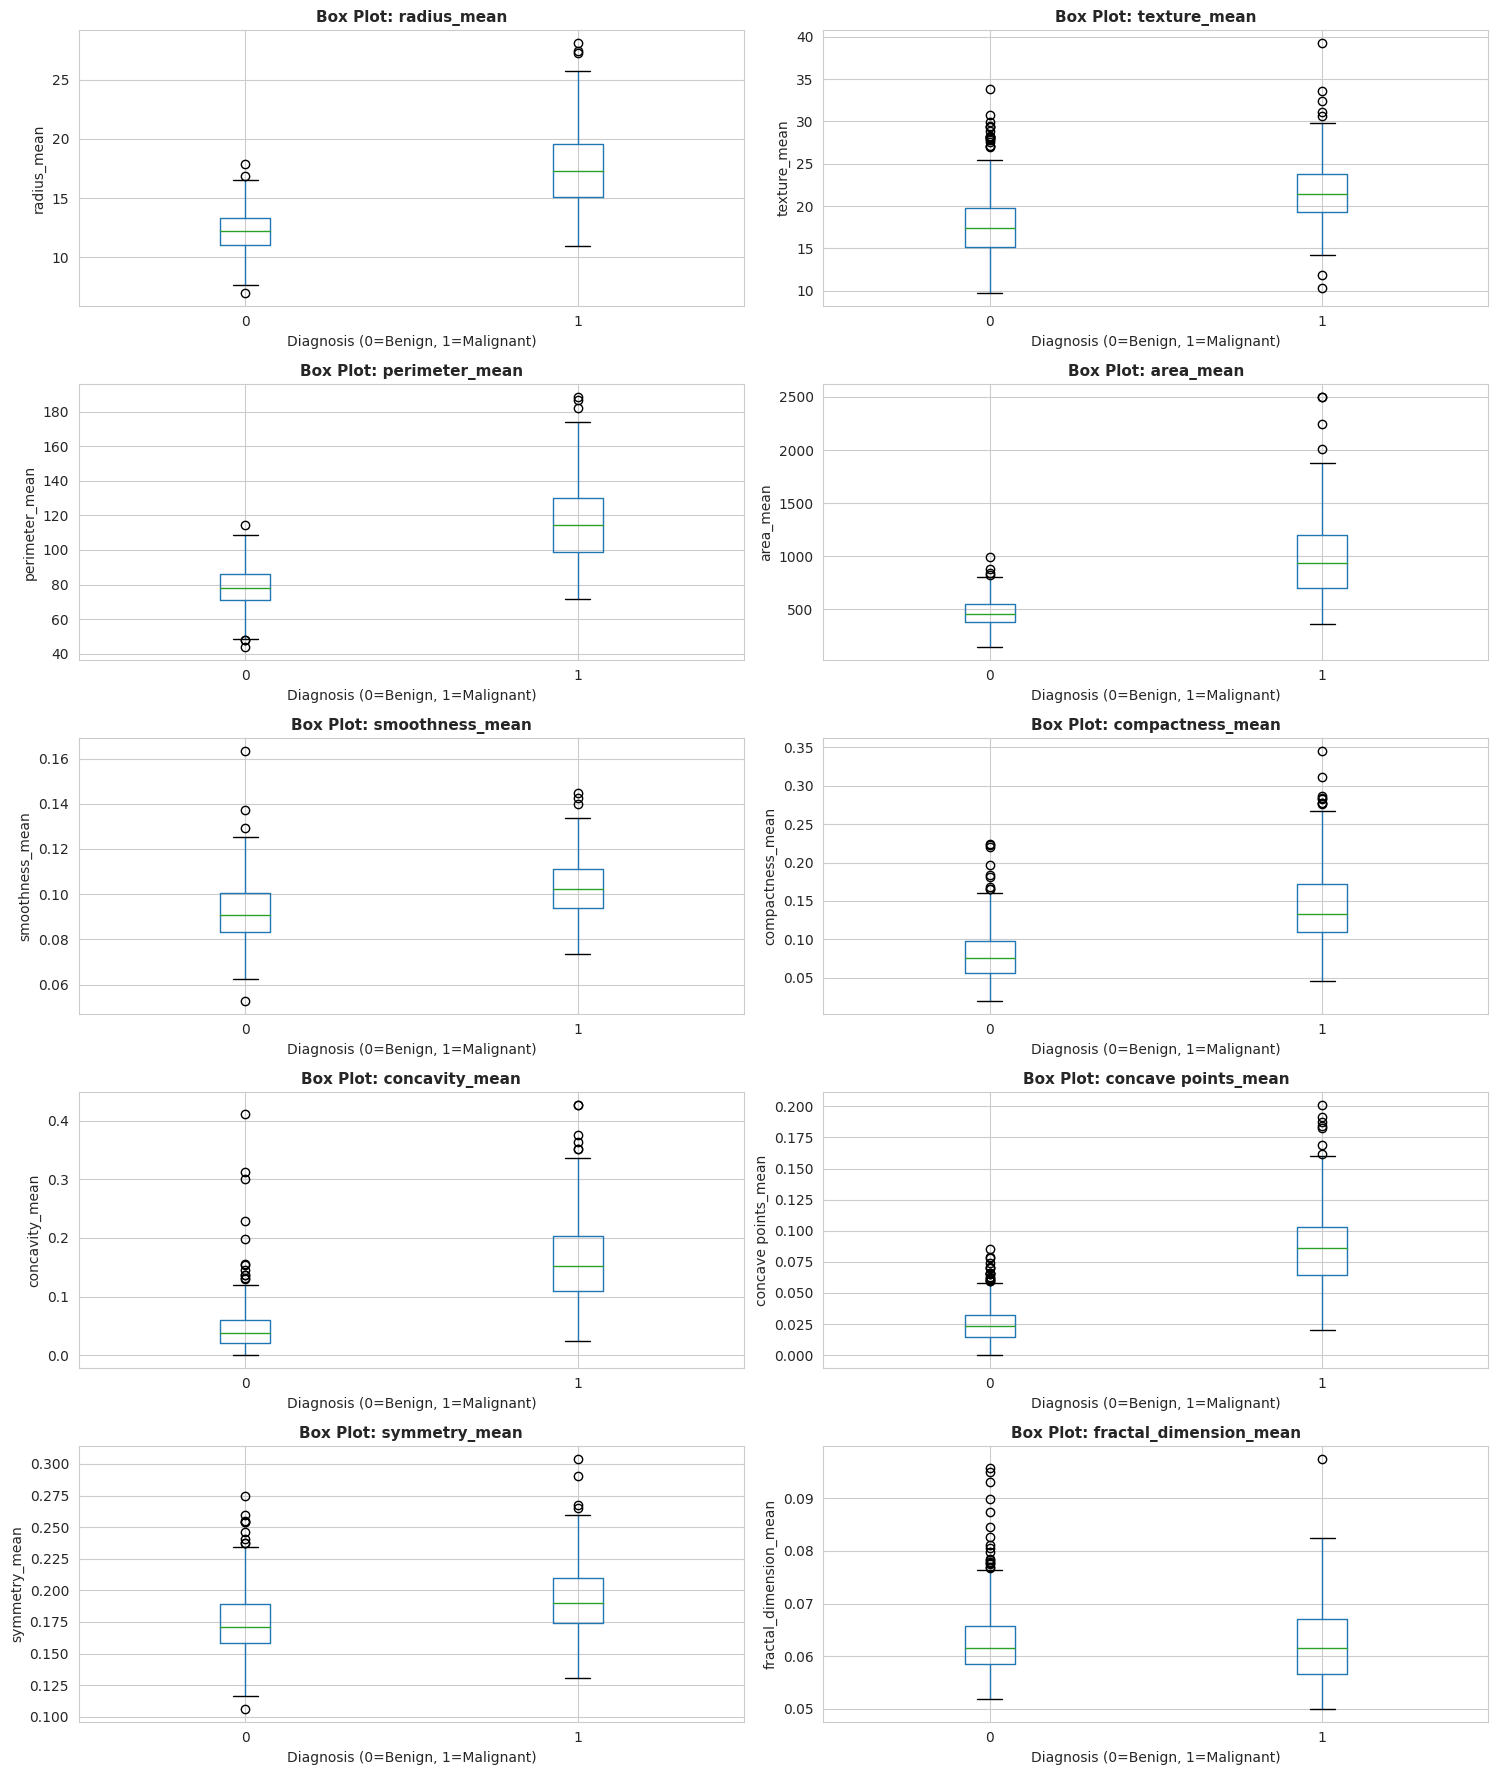

✓ Saved as 'mean_features_boxplot.png'

[3/7] Creating correlation matrix...


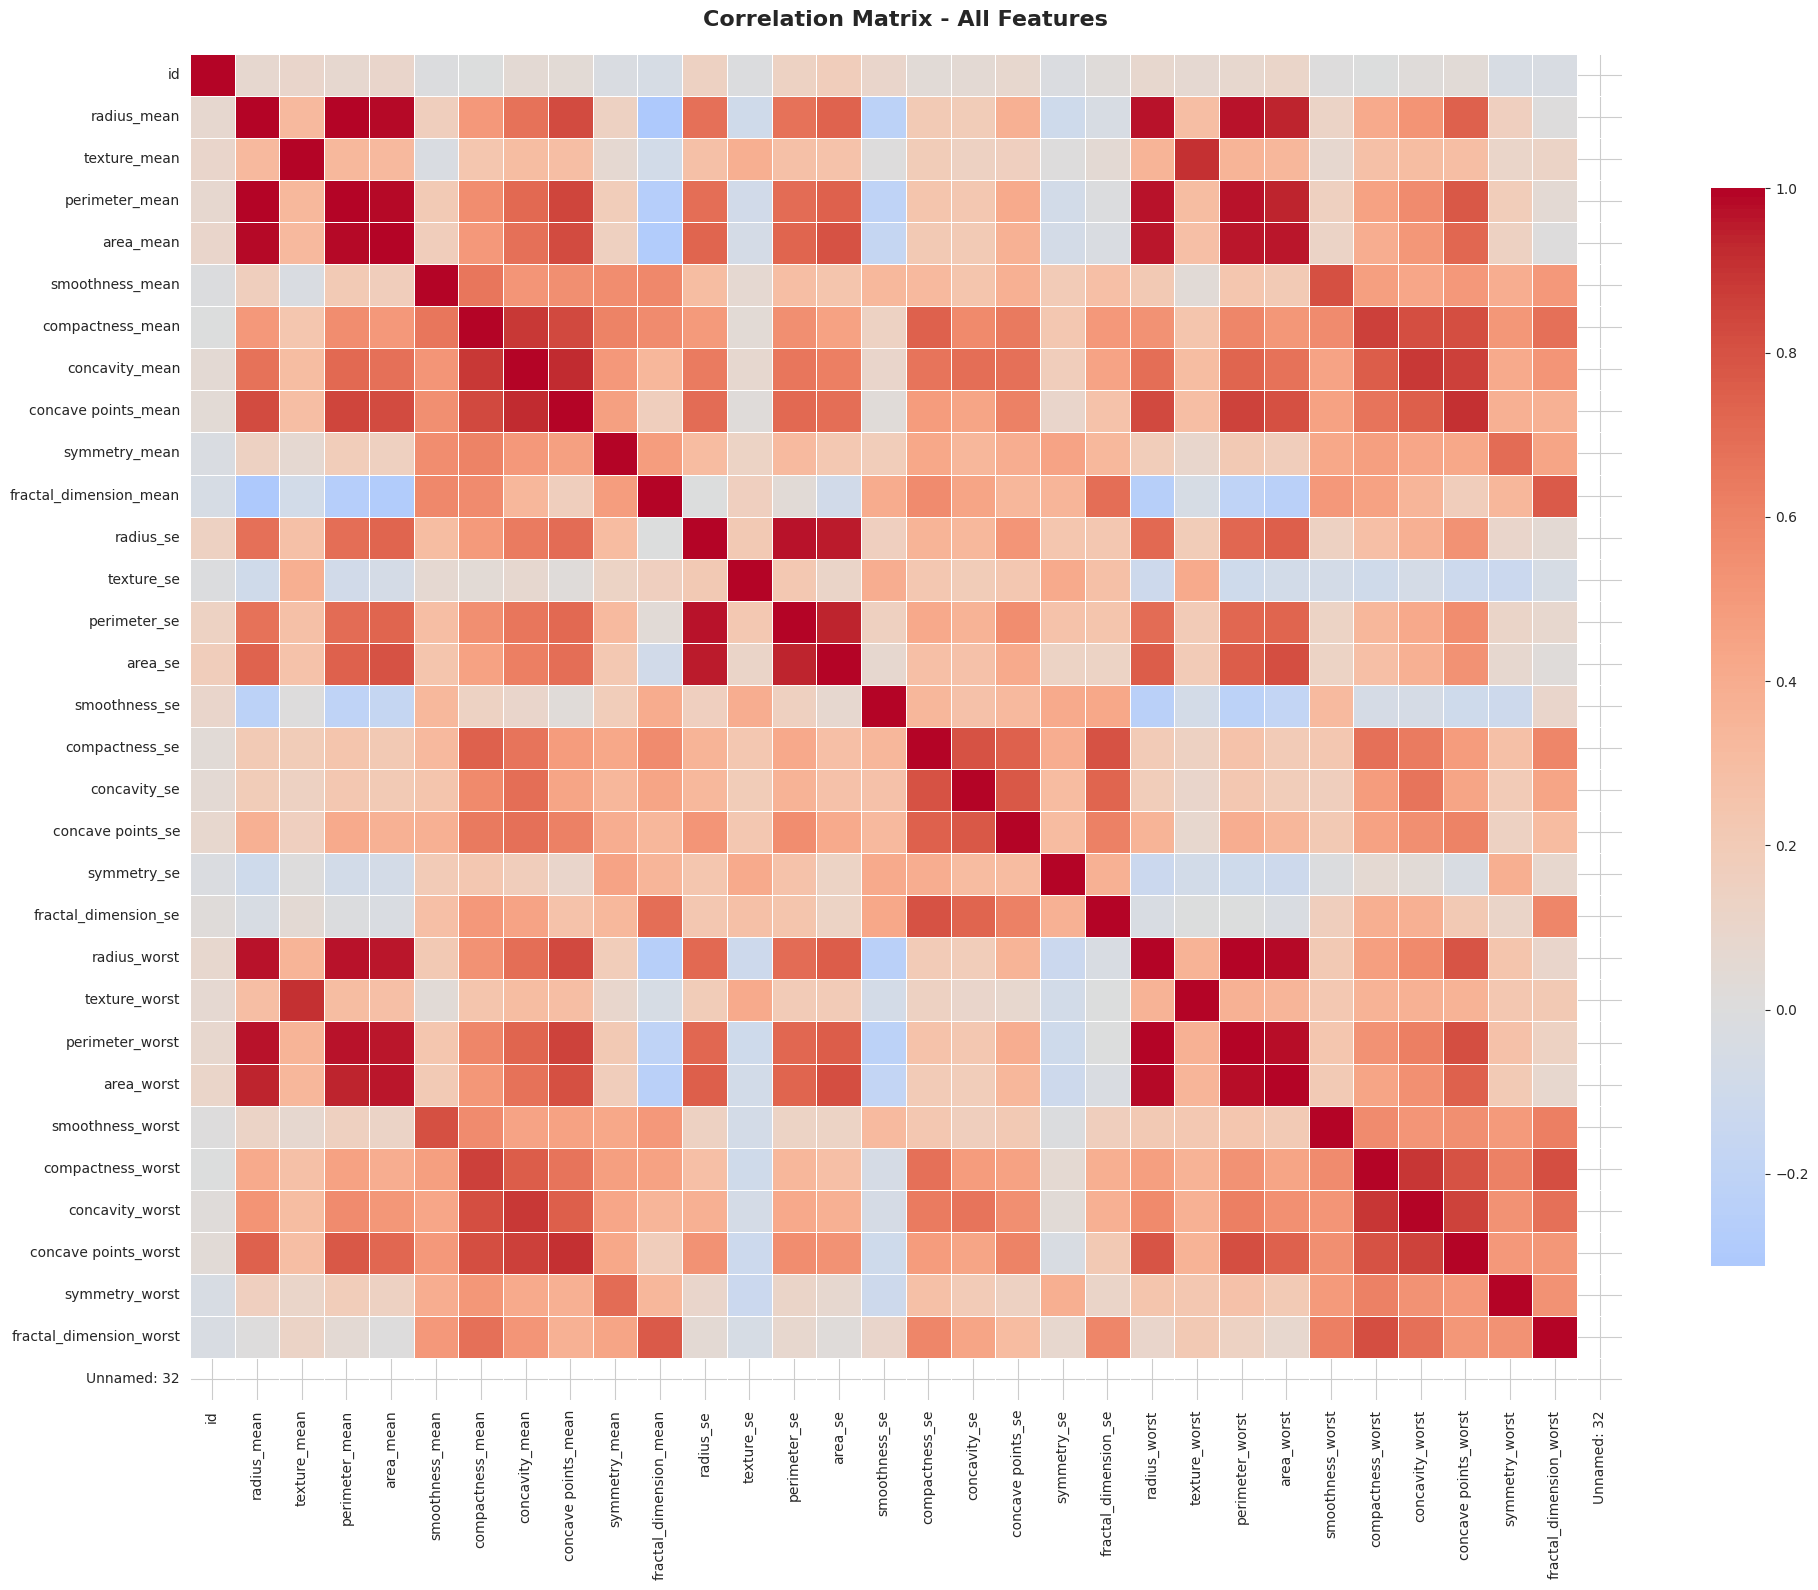

✓ Saved as 'correlation_matrix_full.png'

[4/7] Analyzing correlation with diagnosis...


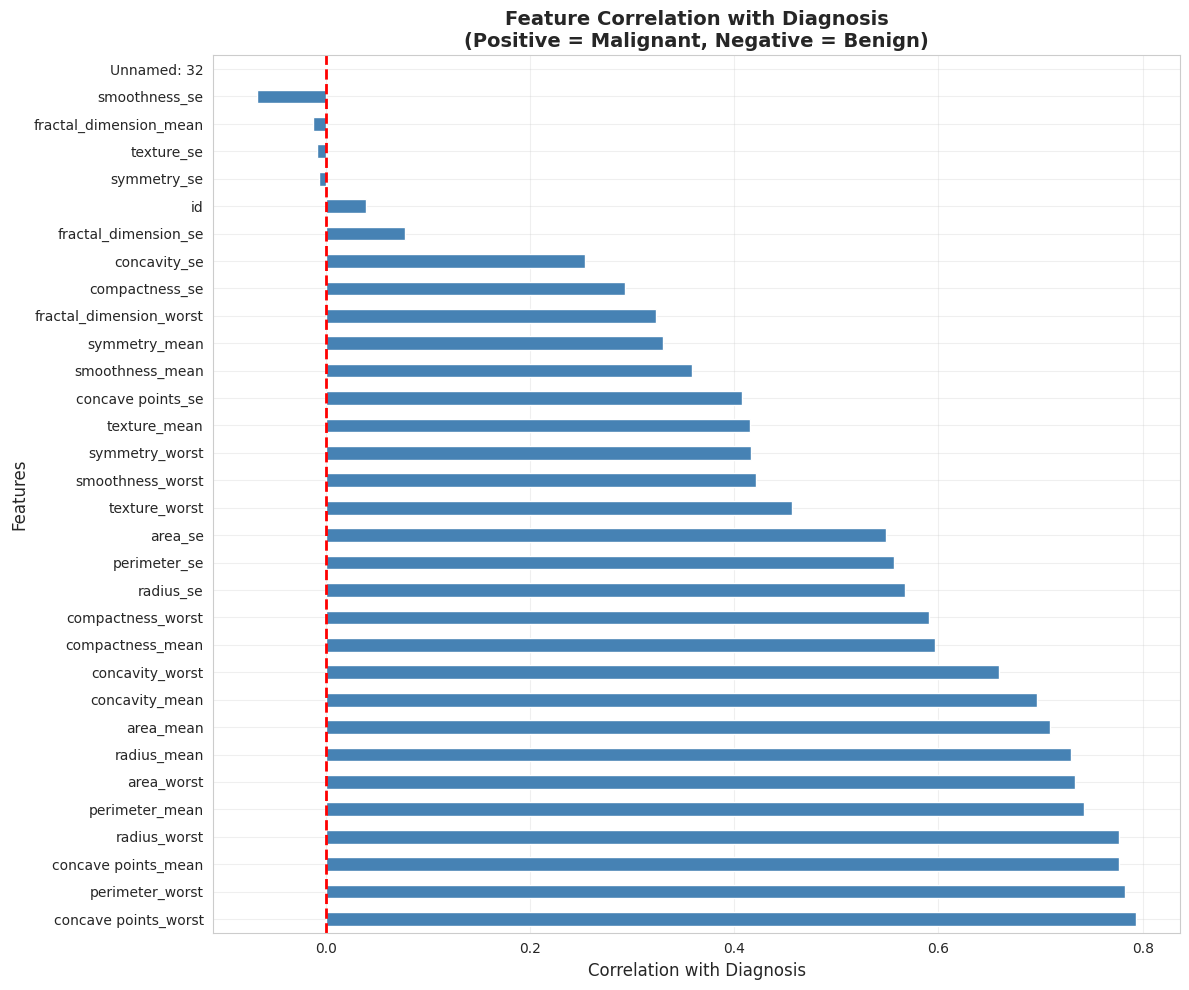

✓ Saved as 'correlation_with_diagnosis.png'

Top 10 features most correlated with Malignant diagnosis:
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64

[5/7] Creating scatter plots for feature categories...


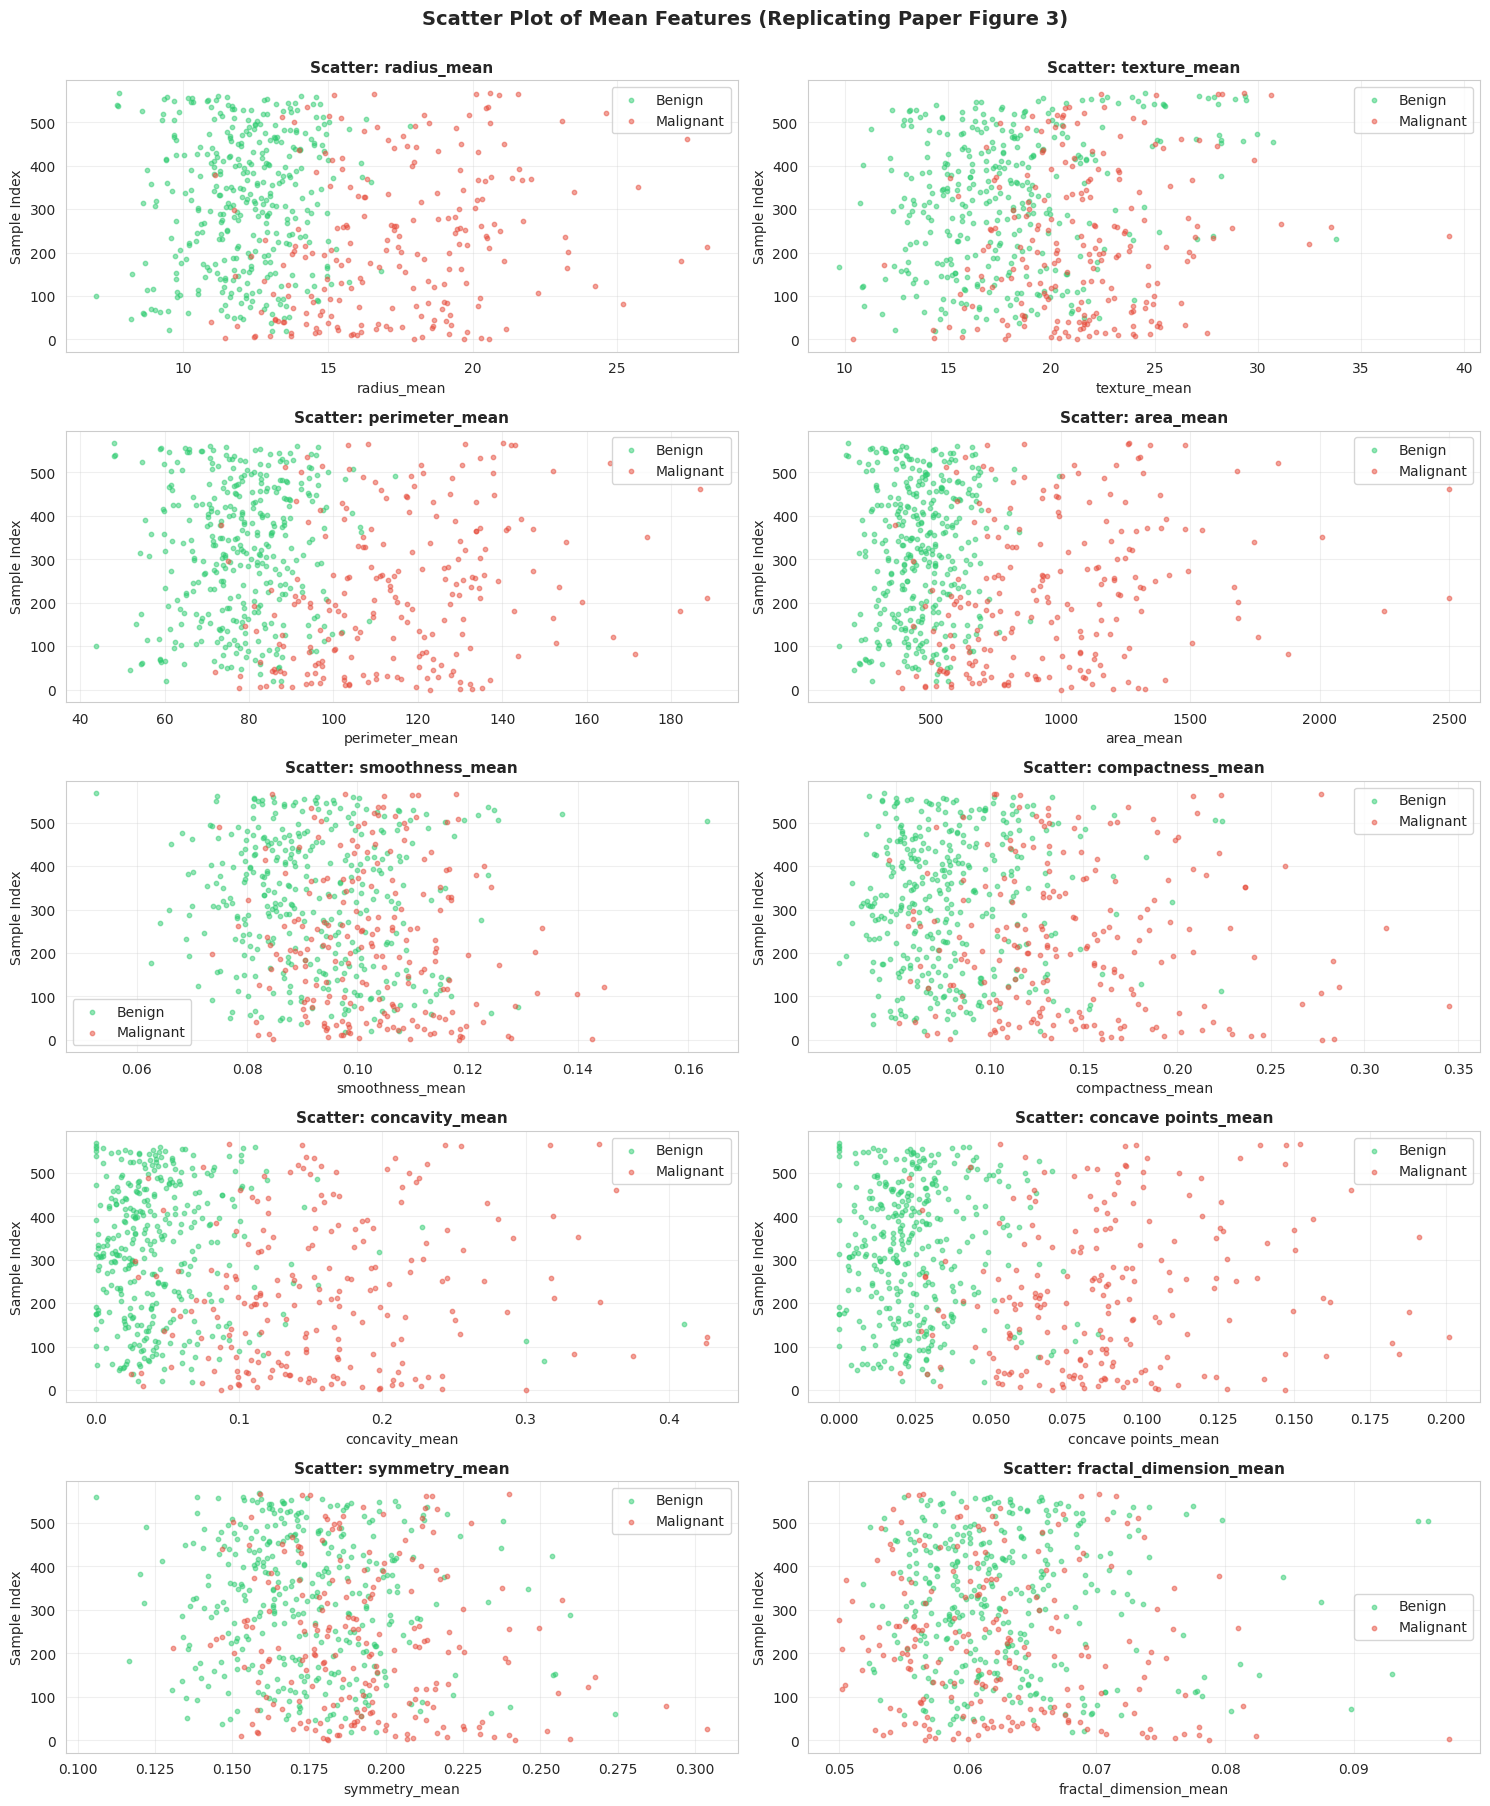

✓ Saved as 'scatter_mean_features.png'


In [9]:
# ============================================================================
#  EXPLORATORY DATA ANALYSIS
# ============================================================================
print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS")
print("="*80)

# 1 Distribution of Mean Features
print("\n[1/7] Creating distribution plots for mean features...")
fig, axes = plt.subplots(5, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(mean_features):
    axes[idx].hist(benign[col], bins=30, alpha=0.6, label='Benign', color='#2ecc71', edgecolor='black')
    axes[idx].hist(malignant[col], bins=30, alpha=0.6, label='Malignant', color='#e74c3c', edgecolor='black')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('mean_features_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved as 'mean_features_distribution.png'")

# 2 Box plots for mean features
print("\n[2/7] Creating box plots for mean features...")
fig, axes = plt.subplots(5, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(mean_features):
    df.boxplot(column=col, by='diagnosis', ax=axes[idx])
    axes[idx].set_xlabel('Diagnosis (0=Benign, 1=Malignant)', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)
    axes[idx].set_title(f'Box Plot: {col}', fontsize=11, fontweight='bold')
    axes[idx].get_figure().suptitle('')

plt.tight_layout()
plt.savefig('mean_features_boxplot.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved as 'mean_features_boxplot.png'")

# 3 Correlation Matrix
print("\n[3/7] Creating correlation matrix...")
# Select only numeric columns (excluding diagnosis for now)
numeric_features = df.drop('diagnosis', axis=1)

plt.figure(figsize=(20, 16))
correlation_matrix = numeric_features.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - All Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_matrix_full.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved as 'correlation_matrix_full.png'")

# 4 Correlation with diagnosis
print("\n[4/7] Analyzing correlation with diagnosis...")
correlations_with_diagnosis = df.corr()['diagnosis'].drop('diagnosis').sort_values(ascending=False)

plt.figure(figsize=(12, 10))
correlations_with_diagnosis.plot(kind='barh', color='steelblue')
plt.xlabel('Correlation with Diagnosis', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Correlation with Diagnosis\n(Positive = Malignant, Negative = Benign)', 
          fontsize=14, fontweight='bold')
plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('correlation_with_diagnosis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved as 'correlation_with_diagnosis.png'")

print("\nTop 10 features most correlated with Malignant diagnosis:")
print(correlations_with_diagnosis.head(10))

# 9.5 Scatter plots (replicating Figure 3, 4, 5 from paper)
print("\n[5/7] Creating scatter plots for feature categories...")

# Mean features scatter plot
fig, axes = plt.subplots(5, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(mean_features):
    axes[idx].scatter(benign[col], benign.index, alpha=0.5, s=10, c='#2ecc71', label='Benign')
    axes[idx].scatter(malignant[col], malignant.index, alpha=0.5, s=10, c='#e74c3c', label='Malignant')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Sample Index', fontsize=10)
    axes[idx].set_title(f'Scatter: {col}', fontsize=11, fontweight='bold')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.suptitle('Scatter Plot of Mean Features (Replicating Paper Figure 3)', 
             fontsize=14, fontweight='bold', y=1.001)
plt.tight_layout()
plt.savefig('scatter_mean_features.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Saved as 'scatter_mean_features.png'")



**3. Data Preparation**# 

In [10]:

# Remove 'id' column as it's not relevant for classification
if 'id' in df.columns:
    df = df.drop('id', axis=1)
    print("\n✓ 'id' column removed")

# Remove 'Unnamed: 32' column if it exists (common in this dataset)
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)
    print("✓ 'Unnamed: 32' column removed")

print(f"\nDataset shape after cleaning: {df.shape}")


✓ 'id' column removed
✓ 'Unnamed: 32' column removed

Dataset shape after cleaning: (569, 31)


In [11]:
# 10. DATA NORMALIZATION
# ============================================================================
print("\n" + "="*80)
print("DATA NORMALIZATION")
print("="*80)

# Separate features and target
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Standardize features using StandardScaler (as mentioned in the paper)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame for easier handling
X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)

print("\n✓ Features normalized using StandardScaler (mean=0, std=1)")
print("\nNormalized data statistics:")
print(X_normalized_df.describe())


DATA NORMALIZATION

Features shape: (569, 30)
Target shape: (569,)

✓ Features normalized using StandardScaler (mean=0, std=1)

Normalized data statistics:
        radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.373633e-16  7.492542e-17    4.745277e-16 -2.060449e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean      1.148856e-15      1.998011e-16    3.746271e-17        -4.995028e-17

In [12]:
# 11. TRAIN-TEST SPLIT
# ============================================================================
print("\n" + "="*80)
print("TRAIN-TEST SPLIT")
print("="*80)

# Split data: 80% train, 20% test (paper used 70/30, but you specified 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.20, random_state=42, stratify=y
)

print(f"\nTraining set size: {X_train.shape[0]} samples ({(X_train.shape[0]/len(df))*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({(X_test.shape[0]/len(df))*100:.1f}%)")

print(f"\nTraining set class distribution:")
print(f"  Benign: {(y_train == 0).sum()} samples")
print(f"  Malignant: {(y_train == 1).sum()} samples")

print(f"\nTesting set class distribution:")
print(f"  Benign: {(y_test == 0).sum()} samples")
print(f"  Malignant: {(y_test == 1).sum()} samples")


TRAIN-TEST SPLIT

Training set size: 455 samples (80.0%)
Testing set size: 114 samples (20.0%)

Training set class distribution:
  Benign: 285 samples
  Malignant: 170 samples

Testing set class distribution:
  Benign: 72 samples
  Malignant: 42 samples


In [13]:
# 12. SAVE PROCESSED DATA
# ============================================================================
print("\n" + "="*80)
print("SAVING PROCESSED DATA")
print("="*80)

# Save normalized data
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

print("\n✓ Data saved successfully:")
print("  - X_train.npy")
print("  - X_test.npy")
print("  - y_train.npy")
print("  - y_test.npy")

# Save feature names
feature_names = X.columns.tolist()
with open('feature_names.txt', 'w') as f:
    for feature in feature_names:
        f.write(f"{feature}\n")
print("  - feature_names.txt")

# Save scaler for future use
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
print("  - scaler.pkl")



SAVING PROCESSED DATA

✓ Data saved successfully:
  - X_train.npy
  - X_test.npy
  - y_train.npy
  - y_test.npy
  - feature_names.txt
  - scaler.pkl


In [14]:
# 13. SUMMARY REPORT
# ============================================================================
print("\n" + "="*80)
print("SUMMARY REPORT")
print("="*80)

summary_report = f"""
WISCONSIN DIAGNOSTIC BREAST CANCER DATASET - EDA REPORT
{'='*80}

1. DATASET OVERVIEW
   - Total samples: {df.shape[0]}
   - Total features: {df.shape[1] - 1} (after removing ID)
   - Classes: Binary (Benign=0, Malignant=1)

2. CLASS DISTRIBUTION
   - Benign (B): {diagnosis_counts['B']} samples ({diagnosis_percentages['B']:.2f}%)
   - Malignant (M): {diagnosis_counts['M']} samples ({diagnosis_percentages['M']:.2f}%)
   - Balance: {'Relatively balanced' if abs(diagnosis_percentages['B'] - diagnosis_percentages['M']) < 20 else 'Imbalanced'}

3. FEATURE CATEGORIES
   - Mean features: {len(mean_features)}
   - Standard Error features: {len(se_features)}
   - Worst features: {len(worst_features)}
   - Total: {len(mean_features) + len(se_features) + len(worst_features)} features

4. DATA QUALITY
   - Missing values: {'None' if len(missing_df) == 0 else f'{len(missing_df)} columns'}
   - Duplicates: {df.duplicated().sum()}
   - Data types: All numeric (after encoding)

5. DATA PREPROCESSING
   - Normalization: StandardScaler (mean=0, std=1)
   - Train-Test Split: {(X_train.shape[0]/len(df))*100:.0f}% / {(X_test.shape[0]/len(df))*100:.0f}%
   - Random State: 42 (for reproducibility)

6. KEY FINDINGS
   - Most correlated features with Malignant diagnosis:
{chr(10).join([f'     • {feat}: {correlations_with_diagnosis[feat]:.3f}' for feat in correlations_with_diagnosis.head(5).index])}
   
   - Least correlated features with Malignant diagnosis:
{chr(10).join([f'     • {feat}: {correlations_with_diagnosis[feat]:.3f}' for feat in correlations_with_diagnosis.tail(5).index])}

7. LINEAR SEPARABILITY
   - The dataset appears to be linearly separable based on visualization
   - This aligns with the paper's findings that linear classifiers performed well
   - Mean features show clear separation between benign and malignant cases

8. FILES GENERATED
   - Training data: X_train.npy, y_train.npy
   - Testing data: X_test.npy, y_test.npy
   - Scaler: scaler.pkl
   - Feature names: feature_names.txt
   - Visualizations: 
     • class_distribution.png
     • mean_features_distribution.png
     • mean_features_boxplot.png
     • correlation_matrix_full.png
     • correlation_with_diagnosis.png
     • scatter_mean_features.png

9. NEXT STEPS (FOR OTHER TEAM MEMBERS)
   - Person 2-6: Load the processed data using:
     ```python
     X_train = np.load('X_train.npy')
     X_test = np.load('X_test.npy')
     y_train = np.load('y_train.npy')
     y_test = np.load('y_test.npy')
     ```
   - Implement ML algorithms: Linear Regression, MLP, Nearest Neighbor, 
     Softmax Regression, SVM, GRU-SVM
   - Target: >90% test accuracy (paper achieved ~99% with MLP)

{'='*80}
Report generated successfully!
"""

print(summary_report)

# Save report to file
with open('EDA_REPORT.txt', 'w', encoding='utf-8') as f:
    f.write(summary_report)

print("\n✓ Complete EDA report saved as 'EDA_REPORT.txt'")

print("\n" + "="*80)
print("DATA PREPARATION & EDA COMPLETED SUCCESSFULLY!")
print("="*80)
print("\nYou can now share the processed data files with your team members.")
print("All visualizations and the detailed report are ready for your project submission.")


SUMMARY REPORT

WISCONSIN DIAGNOSTIC BREAST CANCER DATASET - EDA REPORT

1. DATASET OVERVIEW
   - Total samples: 569
   - Total features: 30 (after removing ID)
   - Classes: Binary (Benign=0, Malignant=1)

2. CLASS DISTRIBUTION
   - Benign (B): 357 samples (62.74%)
   - Malignant (M): 212 samples (37.26%)
   - Balance: Imbalanced

3. FEATURE CATEGORIES
   - Mean features: 10
   - Standard Error features: 10
   - Worst features: 10
   - Total: 30 features

4. DATA QUALITY
   - Missing values: 1 columns
   - Duplicates: 0
   - Data types: All numeric (after encoding)

5. DATA PREPROCESSING
   - Normalization: StandardScaler (mean=0, std=1)
   - Train-Test Split: 80% / 20%
   - Random State: 42 (for reproducibility)

6. KEY FINDINGS
   - Most correlated features with Malignant diagnosis:
     • concave points_worst: 0.794
     • perimeter_worst: 0.783
     • concave points_mean: 0.777
     • radius_worst: 0.776
     • perimeter_mean: 0.743
   
   - Least correlated features with Maligna

# Modeling

In [16]:
from sklearn.preprocessing import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense 

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = Sequential([
    Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
],name='ANN_Model')


2025-11-16 12:09:42.206028: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [20]:
model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [21]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.4767 - loss: 0.7340 - val_accuracy: 0.9231 - val_loss: 0.4968
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8745 - loss: 0.4606 - val_accuracy: 0.9231 - val_loss: 0.3270
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9459 - loss: 0.2802 - val_accuracy: 0.9231 - val_loss: 0.2293
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9366 - loss: 0.2026 - val_accuracy: 0.9341 - val_loss: 0.1787
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9622 - loss: 0.1281 - val_accuracy: 0.9451 - val_loss: 0.1539
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9585 - loss: 0.1107 - val_accuracy: 0.9451 - val_loss: 0.1378
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9651 - loss: 0.0941 - val_accuracy: 0.9560 - val_loss: 0.1268
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9706 - loss: 0.0745 - val_accuracy: 0.9560 - val_loss

# Evaluation

In [22]:
model.summary()


Model: "ANN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,613 (18.02 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,076 (12.02 KB)

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9759 - loss: 0.1623
Test Accuracy: 97.37%


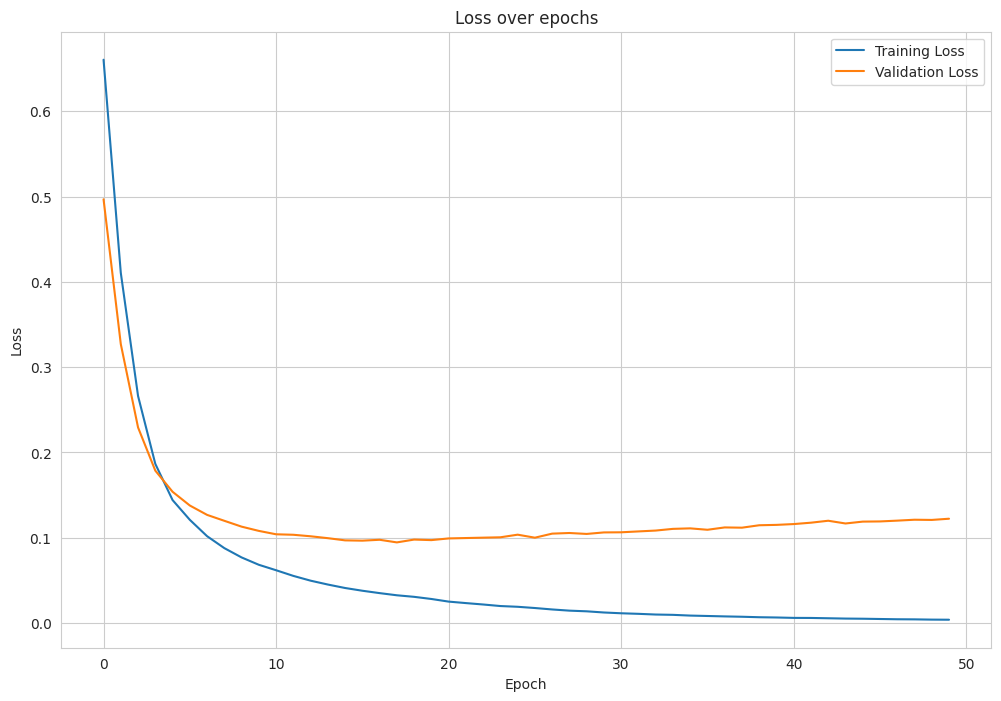

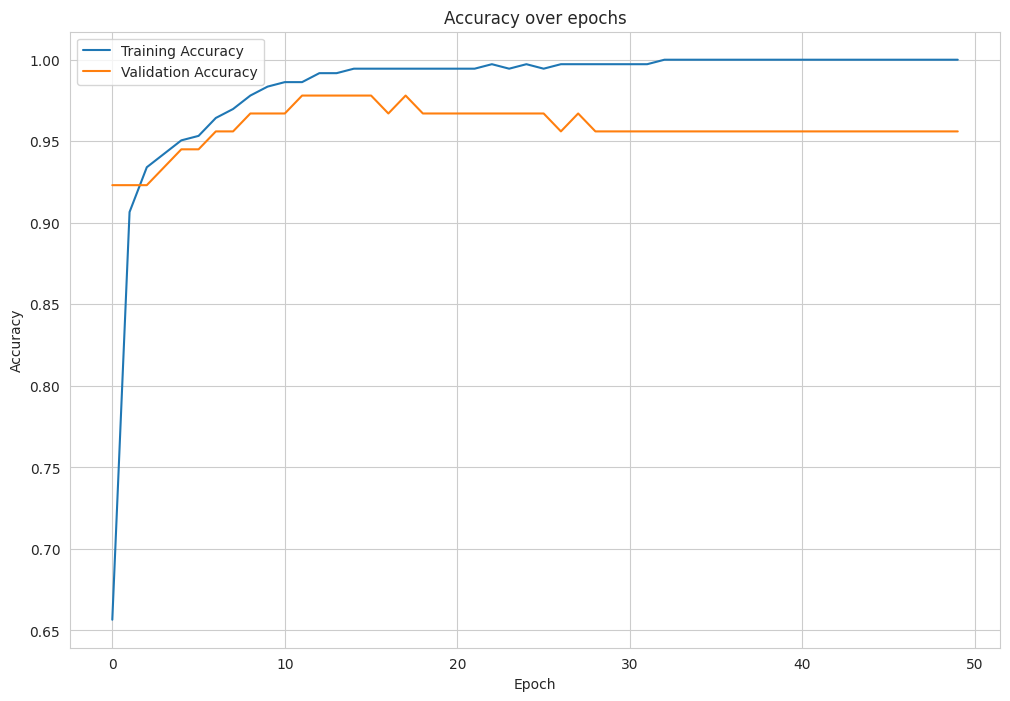

In [24]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


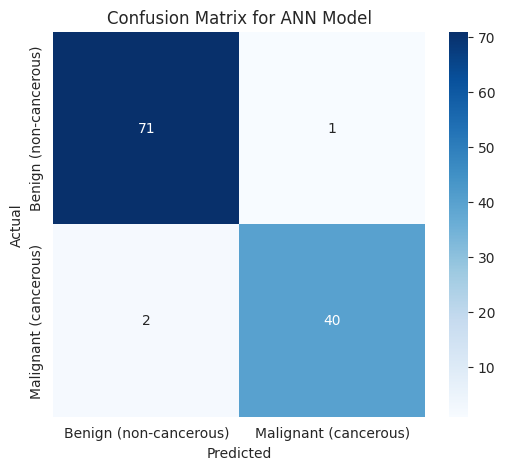

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_prob = model.predict(X_test) 
y_pred = (y_pred_prob > 0.5).astype(int) 

cm = confusion_matrix(y_test, y_pred)

class_names = ['Benign (non-cancerous)', 'Malignant (cancerous)']  
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for ANN Model')
plt.show()


RÉGRESSION LOGISTIQUE

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    roc_auc_score, roc_curve, precision_recall_curve, 
    confusion_matrix, classification_report, auc
)
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.calibration import calibration_curve, CalibrationDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

# Configuration des graphiques
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

print("="*80)
print("PERSONNE 2 : RÉGRESSION LOGISTIQUE + ANALYSE STATISTIQUE AVANCÉE")
print("="*80)
print("\n✓ Bibliothèques importées avec succès\n")

PERSONNE 2 : RÉGRESSION LOGISTIQUE + ANALYSE STATISTIQUE AVANCÉE

✓ Bibliothèques importées avec succès



In [27]:
# ÉTAPE 2 : RÉGRESSION LOGISTIQUE DE BASE
# ============================================================================
print("\n" + "="*80)
print("ÉTAPE 2 : RÉGRESSION LOGISTIQUE DE BASE (SANS RÉGULARISATION)")
print("="*80)

# Modèle de base sans régularisation (C très grand)
lr_base = LogisticRegression(penalty=None, max_iter=10000, random_state=42)
lr_base.fit(X_train, y_train)

# Prédictions
y_pred_base = lr_base.predict(X_test)
y_pred_proba_base = lr_base.predict_proba(X_test)[:, 1]

# Métriques de base
accuracy_base = accuracy_score(y_test, y_pred_base)
precision_base = precision_score(y_test, y_pred_base)
recall_base = recall_score(y_test, y_pred_base)
f1_base = f1_score(y_test, y_pred_base)
auc_base = roc_auc_score(y_test, y_pred_proba_base)

print(f"\n📊 RÉSULTATS DU MODÈLE DE BASE :")
print(f"{'='*50}")
print(f"Accuracy  : {accuracy_base:.4f} ({accuracy_base*100:.2f}%)")
print(f"Precision : {precision_base:.4f}")
print(f"Recall    : {recall_base:.4f}")
print(f"F1-Score  : {f1_base:.4f}")
print(f"AUC-ROC   : {auc_base:.4f}")
print(f"{'='*50}")


ÉTAPE 2 : RÉGRESSION LOGISTIQUE DE BASE (SANS RÉGULARISATION)

📊 RÉSULTATS DU MODÈLE DE BASE :
Accuracy  : 0.9386 (93.86%)
Precision : 0.9487
Recall    : 0.8810
F1-Score  : 0.9136
AUC-ROC   : 0.9684



ÉTAPE 3 : ANALYSE DE MULTICOLINÉARITÉ (VIF)

Le VIF (Variance Inflation Factor) mesure la multicolinéarité :
  • VIF < 5  : Pas de problème
  • VIF 5-10 : Multicolinéarité modérée
  • VIF > 10 : Multicolinéarité élevée (problématique)

📊 TOP 10 FEATURES AVEC VIF LE PLUS ÉLEVÉ :
            Feature         VIF
     perimeter_mean 4110.573130
        radius_mean 4041.752147
       radius_worst  799.619693
    perimeter_worst  419.638192
          area_mean  348.192488
         area_worst  326.077517
          radius_se   80.885287
       perimeter_se   78.795991
     concavity_mean   74.853098
concave points_mean   70.731045

⚠ Features avec VIF > 10 : 24
✓ Features avec VIF < 5  : 3


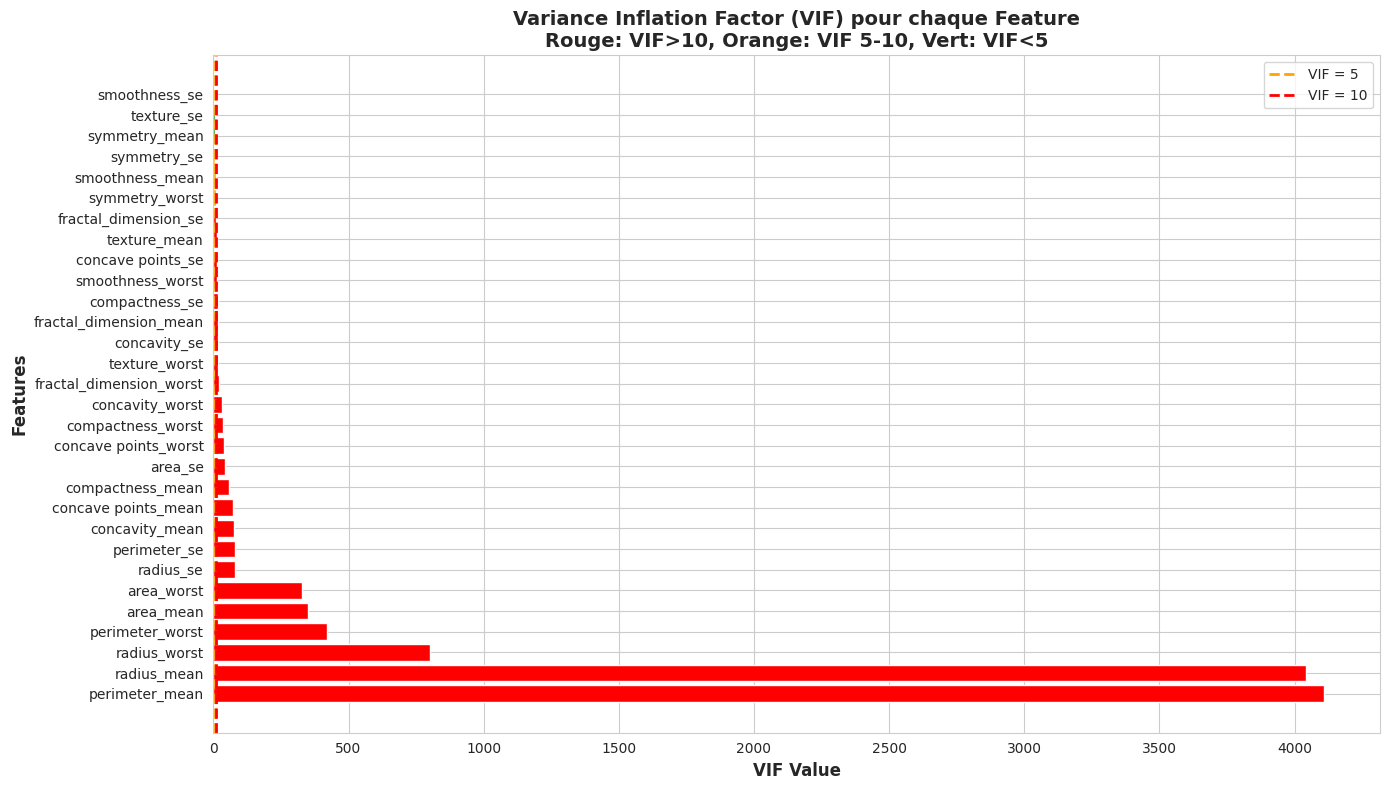


✓ Graphique VIF sauvegardé : 'vif_analysis.png'


In [28]:
#ÉTAPE 3 : ANALYSE DE MULTICOLINÉARITÉ (VIF)
print("\n" + "="*80)
print("ÉTAPE 3 : ANALYSE DE MULTICOLINÉARITÉ (VIF)")
print("="*80)
print("\nLe VIF (Variance Inflation Factor) mesure la multicolinéarité :")
print("  • VIF < 5  : Pas de problème")
print("  • VIF 5-10 : Multicolinéarité modérée")
print("  • VIF > 10 : Multicolinéarité élevée (problématique)\n")

# Créer DataFrame pour VIF
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Calculer VIF pour chaque feature
vif_data = pd.DataFrame()
vif_data["Feature"] = feature_names
vif_data["VIF"] = [variance_inflation_factor(X_train_df.values, i) 
                   for i in range(len(feature_names))]

# Trier par VIF décroissant
vif_data = vif_data.sort_values('VIF', ascending=False).reset_index(drop=True)

print("📊 TOP 10 FEATURES AVEC VIF LE PLUS ÉLEVÉ :")
print(vif_data.head(10).to_string(index=False))

print(f"\n⚠ Features avec VIF > 10 : {(vif_data['VIF'] > 10).sum()}")
print(f"✓ Features avec VIF < 5  : {(vif_data['VIF'] < 5).sum()}")

# Visualisation VIF
plt.figure(figsize=(14, 8))
colors = ['red' if x > 10 else 'orange' if x > 5 else 'green' for x in vif_data['VIF']]
plt.barh(vif_data['Feature'], vif_data['VIF'], color=colors)
plt.xlabel('VIF Value', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Variance Inflation Factor (VIF) pour chaque Feature\nRouge: VIF>10, Orange: VIF 5-10, Vert: VIF<5', 
          fontsize=14, fontweight='bold')
plt.axvline(x=5, color='orange', linestyle='--', linewidth=2, label='VIF = 5')
plt.axvline(x=10, color='red', linestyle='--', linewidth=2, label='VIF = 10')
plt.legend()
plt.tight_layout()
plt.savefig('vif_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Graphique VIF sauvegardé : 'vif_analysis.png'")



ÉTAPE 4 : RÉGULARISATION L1 (LASSO) ET L2 (RIDGE)

Régularisation :
  • L1 (Lasso) : Favorise la sparsité (certains coefficients = 0)
  • L2 (Ridge) : Réduit tous les coefficients uniformément
  • ElasticNet : Combinaison de L1 et L2


📊 COMPARAISON DES RÉGULARISATIONS :
        Model  Accuracy  Precision   Recall  F1-Score  AUC-ROC  Non-zero Coef
Base (No Reg)  0.938596   0.948718 0.880952  0.913580 0.968419             30
   L1 (Lasso)  0.973684   0.975610 0.952381  0.963855 0.996362             14
   L2 (Ridge)  0.964912   0.975000 0.928571  0.951220 0.996032             30
   ElasticNet  0.964912   0.975000 0.928571  0.951220 0.996693             26


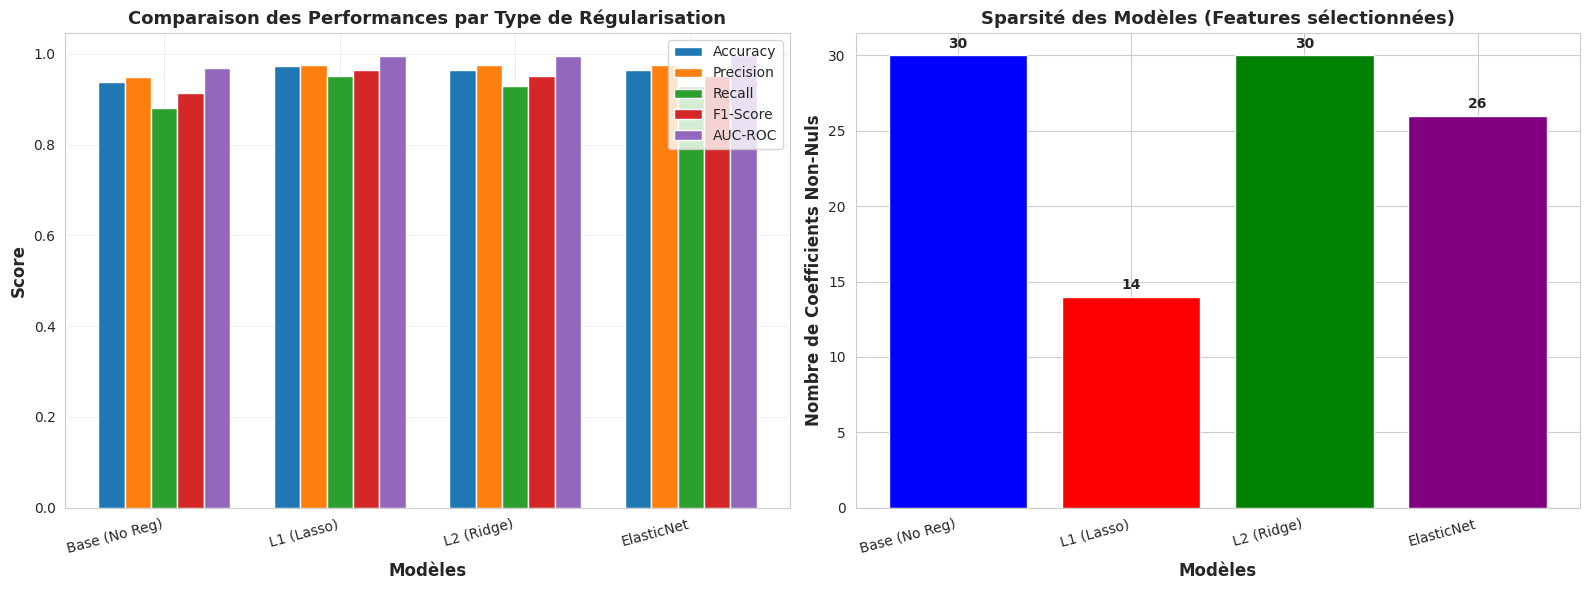


✓ Graphique de comparaison sauvegardé : 'regularization_comparison.png'


In [29]:
print("\n" + "="*80)
print("ÉTAPE 4 : RÉGULARISATION L1 (LASSO) ET L2 (RIDGE)")
print("="*80)
print("\nRégularisation :")
print("  • L1 (Lasso) : Favorise la sparsité (certains coefficients = 0)")
print("  • L2 (Ridge) : Réduit tous les coefficients uniformément")
print("  • ElasticNet : Combinaison de L1 et L2\n")

# L1 Régularisation (Lasso)
lr_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', 
                           max_iter=10000, random_state=42)
lr_l1.fit(X_train, y_train)
y_pred_l1 = lr_l1.predict(X_test)
y_pred_proba_l1 = lr_l1.predict_proba(X_test)[:, 1]

# L2 Régularisation (Ridge)
lr_l2 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', 
                           max_iter=10000, random_state=42)
lr_l2.fit(X_train, y_train)
y_pred_l2 = lr_l2.predict(X_test)
y_pred_proba_l2 = lr_l2.predict_proba(X_test)[:, 1]

# ElasticNet
lr_elastic = LogisticRegression(penalty='elasticnet', C=1.0, solver='saga',
                                l1_ratio=0.5, max_iter=10000, random_state=42)
lr_elastic.fit(X_train, y_train)
y_pred_elastic = lr_elastic.predict(X_test)
y_pred_proba_elastic = lr_elastic.predict_proba(X_test)[:, 1]

# Comparaison des régularisations
results_reg = pd.DataFrame({
    'Model': ['Base (No Reg)', 'L1 (Lasso)', 'L2 (Ridge)', 'ElasticNet'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_base),
        accuracy_score(y_test, y_pred_l1),
        accuracy_score(y_test, y_pred_l2),
        accuracy_score(y_test, y_pred_elastic)
    ],
    'Precision': [
        precision_score(y_test, y_pred_base),
        precision_score(y_test, y_pred_l1),
        precision_score(y_test, y_pred_l2),
        precision_score(y_test, y_pred_elastic)
    ],
    'Recall': [
        recall_score(y_test, y_pred_base),
        recall_score(y_test, y_pred_l1),
        recall_score(y_test, y_pred_l2),
        recall_score(y_test, y_pred_elastic)
    ],
    'F1-Score': [
        f1_score(y_test, y_pred_base),
        f1_score(y_test, y_pred_l1),
        f1_score(y_test, y_pred_l2),
        f1_score(y_test, y_pred_elastic)
    ],
    'AUC-ROC': [
        roc_auc_score(y_test, y_pred_proba_base),
        roc_auc_score(y_test, y_pred_proba_l1),
        roc_auc_score(y_test, y_pred_proba_l2),
        roc_auc_score(y_test, y_pred_proba_elastic)
    ],
    'Non-zero Coef': [
        np.sum(lr_base.coef_[0] != 0),
        np.sum(lr_l1.coef_[0] != 0),
        np.sum(lr_l2.coef_[0] != 0),
        np.sum(lr_elastic.coef_[0] != 0)
    ]
})

print("\n📊 COMPARAISON DES RÉGULARISATIONS :")
print(results_reg.to_string(index=False))

# Visualisation
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Graphique des métriques
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
x = np.arange(len(results_reg))
width = 0.15

for i, metric in enumerate(metrics):
    axes[0].bar(x + i*width, results_reg[metric], width, label=metric)

axes[0].set_xlabel('Modèles', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0].set_title('Comparaison des Performances par Type de Régularisation', 
                  fontsize=13, fontweight='bold')
axes[0].set_xticks(x + width * 2)
axes[0].set_xticklabels(results_reg['Model'], rotation=15, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Nombre de coefficients non-nuls
axes[1].bar(results_reg['Model'], results_reg['Non-zero Coef'], 
            color=['blue', 'red', 'green', 'purple'])
axes[1].set_xlabel('Modèles', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Nombre de Coefficients Non-Nuls', fontsize=12, fontweight='bold')
axes[1].set_title('Sparsité des Modèles (Features sélectionnées)', 
                  fontsize=13, fontweight='bold')
axes[1].set_xticklabels(results_reg['Model'], rotation=15, ha='right')
for i, v in enumerate(results_reg['Non-zero Coef']):
    axes[1].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('regularization_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Graphique de comparaison sauvegardé : 'regularization_comparison.png'")

In [30]:
# ============================================================================
# ÉTAPE 5 : OPTIMISATION AVEC GRIDSEARCHCV
# ============================================================================
print("\n" + "="*80)
print("ÉTAPE 5 : OPTIMISATION DES HYPERPARAMÈTRES (GRIDSEARCHCV)")
print("="*80)
print("\nRecherche des meilleurs hyperparamètres...")
print("Cela peut prendre quelques minutes...\n")

# Définir la grille de paramètres
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Pour ElasticNet
}

# GridSearchCV avec validation croisée 5-fold
grid_search = GridSearchCV(
    LogisticRegression(max_iter=10000, random_state=42),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Adapter le param_grid pour éviter les combinaisons invalides
# L1 nécessite liblinear ou saga, L2 peut utiliser lbfgs
param_grid_valid = []
for penalty in ['l1', 'l2']:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        if penalty == 'l1':
            param_grid_valid.append({'penalty': [penalty], 'C': [C], 
                                    'solver': ['liblinear', 'saga']})
        else:
            param_grid_valid.append({'penalty': [penalty], 'C': [C], 
                                    'solver': ['liblinear', 'lbfgs', 'saga']})

# ElasticNet avec saga
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    for l1_r in [0.1, 0.3, 0.5, 0.7, 0.9]:
        param_grid_valid.append({
            'penalty': ['elasticnet'], 
            'C': [C], 
            'solver': ['saga'],
            'l1_ratio': [l1_r]
        })

# Nouvelle GridSearch avec paramètres valides
grid_search = GridSearchCV(
    LogisticRegression(max_iter=10000, random_state=42),
    param_grid_valid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=0
)

grid_search.fit(X_train, y_train)

print("\n✓ Optimisation terminée!")
print(f"\n🏆 MEILLEURS HYPERPARAMÈTRES :")
print(f"{'='*50}")
for param, value in grid_search.best_params_.items():
    print(f"{param:15s} : {value}")
print(f"{'='*50}")
print(f"Meilleur score AUC-ROC (CV) : {grid_search.best_score_:.4f}")

# Modèle optimisé
lr_optimized = grid_search.best_estimator_
y_pred_opt = lr_optimized.predict(X_test)
y_pred_proba_opt = lr_optimized.predict_proba(X_test)[:, 1]


ÉTAPE 5 : OPTIMISATION DES HYPERPARAMÈTRES (GRIDSEARCHCV)

Recherche des meilleurs hyperparamètres...
Cela peut prendre quelques minutes...


✓ Optimisation terminée!

🏆 MEILLEURS HYPERPARAMÈTRES :
C               : 10
penalty         : l1
solver          : saga
Meilleur score AUC-ROC (CV) : 0.9961



ÉTAPE 6 : ÉVALUATION COMPLÈTE DU MODÈLE OPTIMISÉ

📊 PERFORMANCES DU MODÈLE OPTIMISÉ :
Accuracy  : 0.9649 (96.49%)
Precision : 0.9750
Recall    : 0.9286
F1-Score  : 0.9512
AUC-ROC   : 0.9831

📋 RAPPORT DE CLASSIFICATION DÉTAILLÉ :
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        72
   Malignant       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


🔄 VALIDATION CROISÉE (5-Fold) :
Scores AUC-ROC : [0.99742002 1.         0.9876161  1.         0.99535604]
Moyenne        : 0.9961
Écart-type     : 0.0046

ÉTAPE 7 : CRÉATION DES VISUALISATIONS


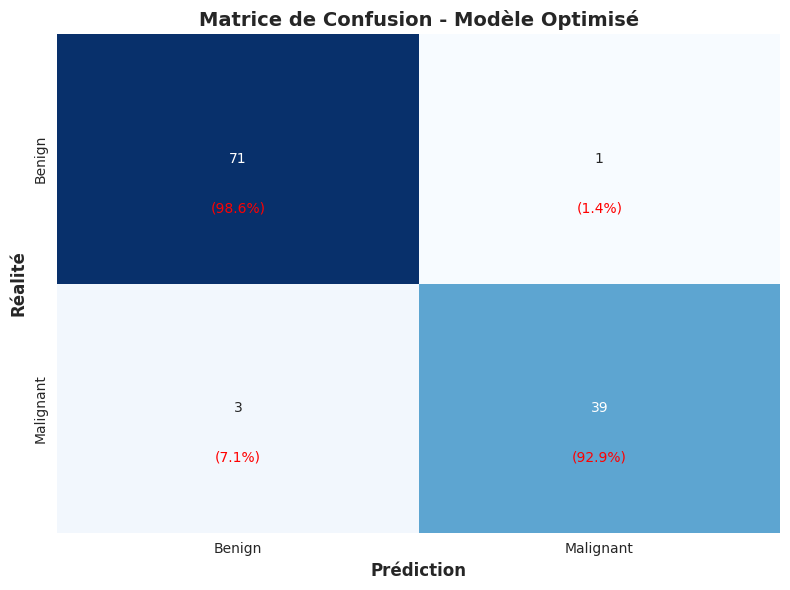

✓ Matrice de confusion sauvegardée : 'confusion_matrix.png'


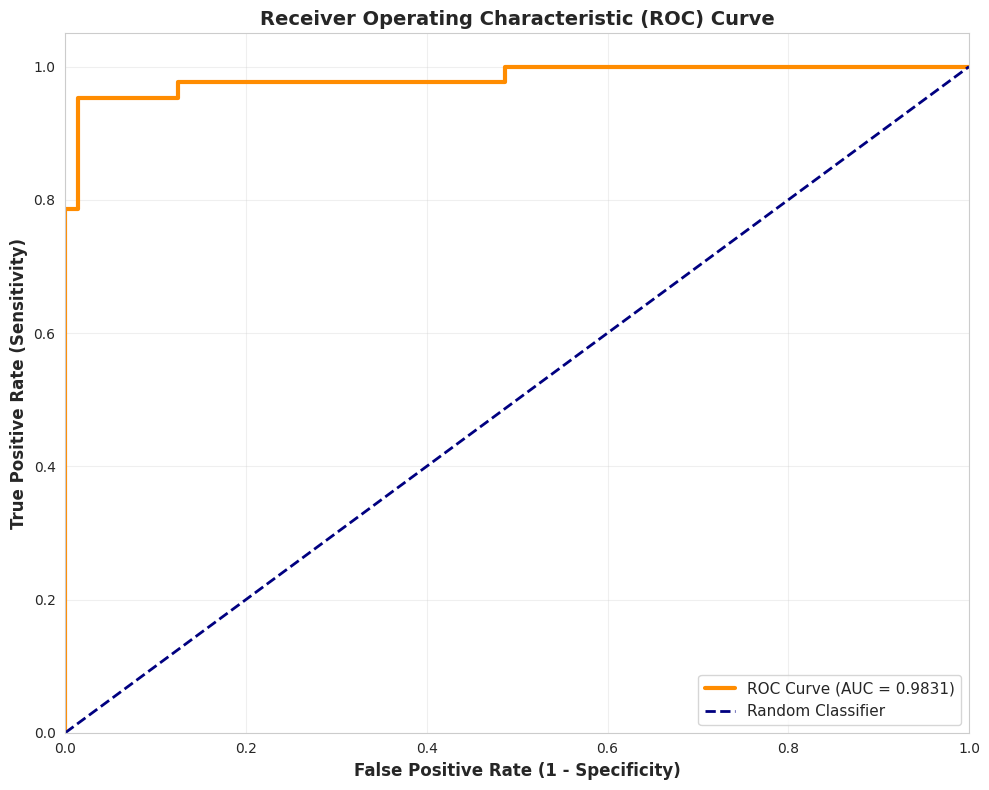

✓ Courbe ROC sauvegardée : 'roc_curve.png'


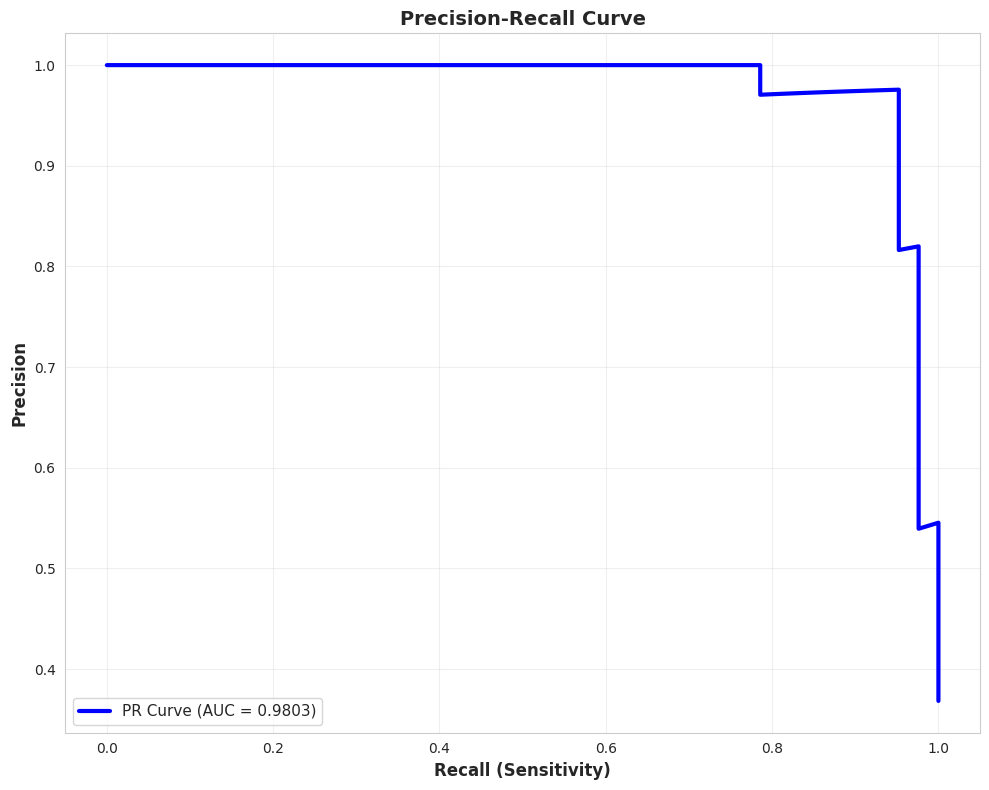

✓ Courbe Precision-Recall sauvegardée : 'precision_recall_curve.png'


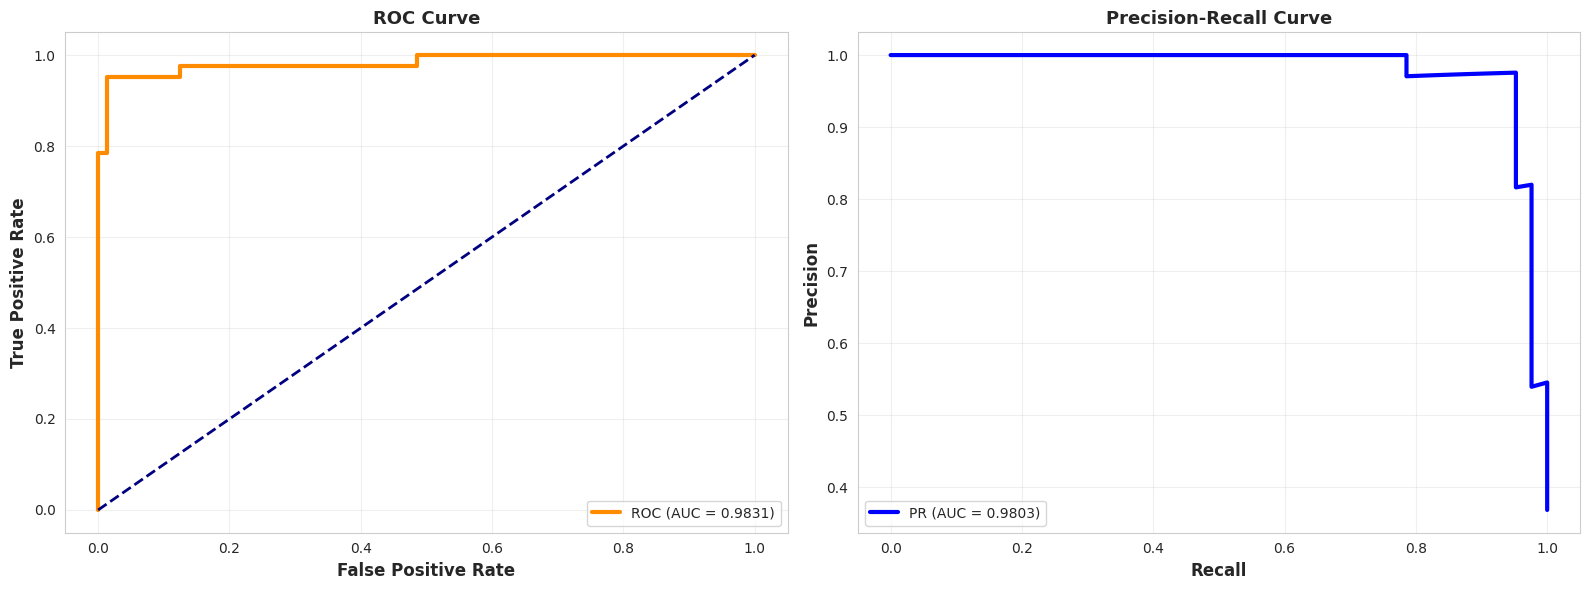

✓ Courbes combinées sauvegardées : 'roc_pr_combined.png'


In [31]:
# ÉTAPE 6 : ÉVALUATION COMPLÈTE DES PERFORMANCES
# ============================================================================
print("\n" + "="*80)
print("ÉTAPE 6 : ÉVALUATION COMPLÈTE DU MODÈLE OPTIMISÉ")
print("="*80)

# Métriques complètes
accuracy_opt = accuracy_score(y_test, y_pred_opt)
precision_opt = precision_score(y_test, y_pred_opt)
recall_opt = recall_score(y_test, y_pred_opt)
f1_opt = f1_score(y_test, y_pred_opt)
auc_opt = roc_auc_score(y_test, y_pred_proba_opt)

print(f"\n📊 PERFORMANCES DU MODÈLE OPTIMISÉ :")
print(f"{'='*50}")
print(f"Accuracy  : {accuracy_opt:.4f} ({accuracy_opt*100:.2f}%)")
print(f"Precision : {precision_opt:.4f}")
print(f"Recall    : {recall_opt:.4f}")
print(f"F1-Score  : {f1_opt:.4f}")
print(f"AUC-ROC   : {auc_opt:.4f}")
print(f"{'='*50}")

# Rapport de classification détaillé
print(f"\n📋 RAPPORT DE CLASSIFICATION DÉTAILLÉ :")
print(classification_report(y_test, y_pred_opt, 
                          target_names=['Benign', 'Malignant']))

# Validation croisée
cv_scores = cross_val_score(lr_optimized, X_train, y_train, 
                           cv=5, scoring='roc_auc')
print(f"\n🔄 VALIDATION CROISÉE (5-Fold) :")
print(f"Scores AUC-ROC : {cv_scores}")
print(f"Moyenne        : {cv_scores.mean():.4f}")
print(f"Écart-type     : {cv_scores.std():.4f}")

# ============================================================================
# ÉTAPE 7 : VISUALISATIONS AVANCÉES
# ============================================================================
print("\n" + "="*80)
print("ÉTAPE 7 : CRÉATION DES VISUALISATIONS")
print("="*80)

# 7.1 Matrice de Confusion
cm = confusion_matrix(y_test, y_pred_opt)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Prédiction', fontsize=12, fontweight='bold')
plt.ylabel('Réalité', fontsize=12, fontweight='bold')
plt.title('Matrice de Confusion - Modèle Optimisé', fontsize=14, fontweight='bold')

# Ajouter les pourcentages
for i in range(2):
    for j in range(2):
        percentage = cm[i, j] / cm[i].sum() * 100
        plt.text(j+0.5, i+0.7, f'({percentage:.1f}%)', 
                ha='center', va='center', fontsize=10, color='red')

plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Matrice de confusion sauvegardée : 'confusion_matrix.png'")

# 7.2 Courbe ROC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba_opt)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=3, 
         label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', 
         label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
plt.title('Receiver Operating Characteristic (ROC) Curve', 
          fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Courbe ROC sauvegardée : 'roc_curve.png'")

# 7.3 Courbe Precision-Recall
precision_curve, recall_curve, thresholds_pr = precision_recall_curve(
    y_test, y_pred_proba_opt)
pr_auc = auc(recall_curve, precision_curve)

plt.figure(figsize=(10, 8))
plt.plot(recall_curve, precision_curve, color='blue', lw=3,
         label=f'PR Curve (AUC = {pr_auc:.4f})')
plt.xlabel('Recall (Sensitivity)', fontsize=12, fontweight='bold')
plt.ylabel('Precision', fontsize=12, fontweight='bold')
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.legend(loc="lower left", fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('precision_recall_curve.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Courbe Precision-Recall sauvegardée : 'precision_recall_curve.png'")

# 7.4 Courbes ROC et PR combinées
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ROC
axes[0].plot(fpr, tpr, color='darkorange', lw=3, 
            label=f'ROC (AUC = {roc_auc:.4f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
axes[0].set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
axes[0].set_title('ROC Curve', fontsize=13, fontweight='bold')
axes[0].legend(loc="lower right")
axes[0].grid(True, alpha=0.3)

# PR Curve
axes[1].plot(recall_curve, precision_curve, color='blue', lw=3,
            label=f'PR (AUC = {pr_auc:.4f})')
axes[1].set_xlabel('Recall', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Precision', fontsize=12, fontweight='bold')
axes[1].set_title('Precision-Recall Curve', fontsize=13, fontweight='bold')
axes[1].legend(loc="lower left")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('roc_pr_combined.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Courbes combinées sauvegardées : 'roc_pr_combined.png'")


ÉTAPE 8 : INTERPRÉTATION DES COEFFICIENTS (IMPORTANCE DES FEATURES)

📊 TOP 15 FEATURES LES PLUS IMPORTANTES :
            Feature  Coefficient  Abs_Coefficient
          radius_se     4.787090         4.787090
      texture_worst     4.230699         4.230699
concave points_mean     3.663648         3.663648
            area_se     3.360643         3.360643
   compactness_mean    -3.180223         3.180223
     symmetry_worst     3.161886         3.161886
    concavity_worst     3.094720         3.094720
  concave points_se     3.067001         3.067001
     compactness_se    -2.437972         2.437972
         area_worst     2.296349         2.296349
         texture_se    -2.162667         2.162667
        symmetry_se    -1.865251         1.865251
     concavity_mean     1.762166         1.762166
       perimeter_se     1.677998         1.677998
       concavity_se    -1.531760         1.531760

💡 INTERPRÉTATION :
  • Coefficient > 0 : Augmente la probabilité de MALIGNITÉ
  • Coeffi

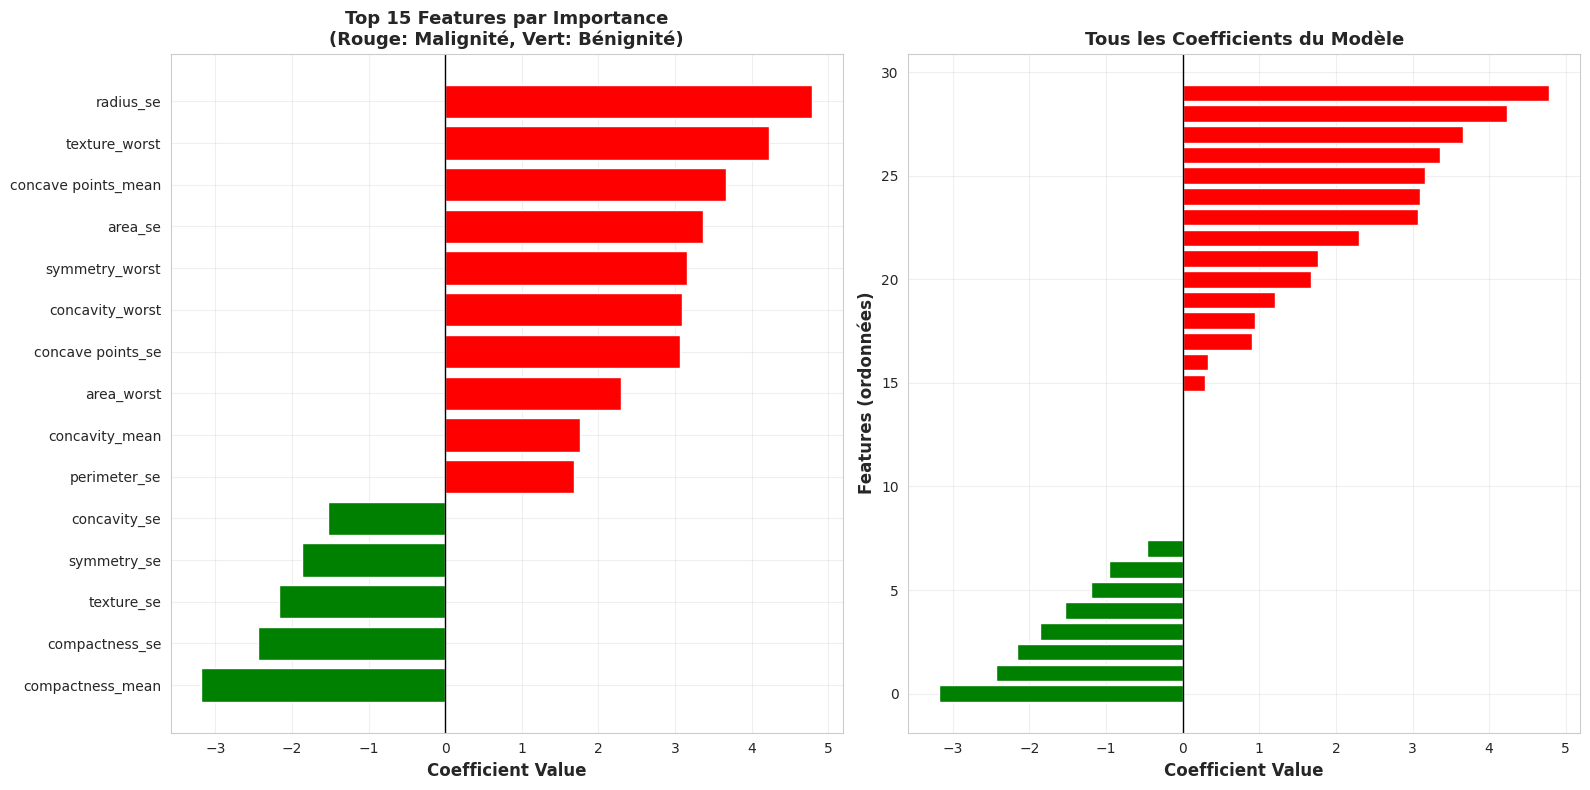


✓ Importance des features sauvegardée : 'feature_importance.png'


In [32]:
# ÉTAPE 8 : INTERPRÉTATION DES COEFFICIENTS
# ============================================================================
print("\n" + "="*80)
print("ÉTAPE 8 : INTERPRÉTATION DES COEFFICIENTS (IMPORTANCE DES FEATURES)")
print("="*80)

# Récupérer les coefficients
coefficients = lr_optimized.coef_[0]
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print("\n📊 TOP 15 FEATURES LES PLUS IMPORTANTES :")
print(coef_df.head(15).to_string(index=False))

print("\n💡 INTERPRÉTATION :")
print("  • Coefficient > 0 : Augmente la probabilité de MALIGNITÉ")
print("  • Coefficient < 0 : Augmente la probabilité de BÉNIGNITÉ")
print("  • |Coefficient| élevé : Feature très influente")

# Visualisation des coefficients
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Top 15 features
top_15 = coef_df.head(15).sort_values('Coefficient')
colors = ['red' if x > 0 else 'green' for x in top_15['Coefficient']]
axes[0].barh(top_15['Feature'], top_15['Coefficient'], color=colors)
axes[0].set_xlabel('Coefficient Value', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Features par Importance\n(Rouge: Malignité, Vert: Bénignité)', 
                  fontsize=13, fontweight='bold')
axes[0].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[0].grid(True, alpha=0.3)

# Tous les coefficients triés
all_coef = coef_df.sort_values('Coefficient')
colors_all = ['red' if x > 0 else 'green' for x in all_coef['Coefficient']]
axes[1].barh(range(len(all_coef)), all_coef['Coefficient'], color=colors_all)
axes[1].set_xlabel('Coefficient Value', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Features (ordonnées)', fontsize=12, fontweight='bold')
axes[1].set_title('Tous les Coefficients du Modèle', fontsize=13, fontweight='bold')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=1)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Importance des features sauvegardée : 'feature_importance.png'")



ÉTAPE 9 : TEST DE CALIBRATION DU MODÈLE

La calibration mesure si les probabilités prédites sont fiables.
Un modèle bien calibré : si prédit 70%, environ 70% sont réellement positifs.



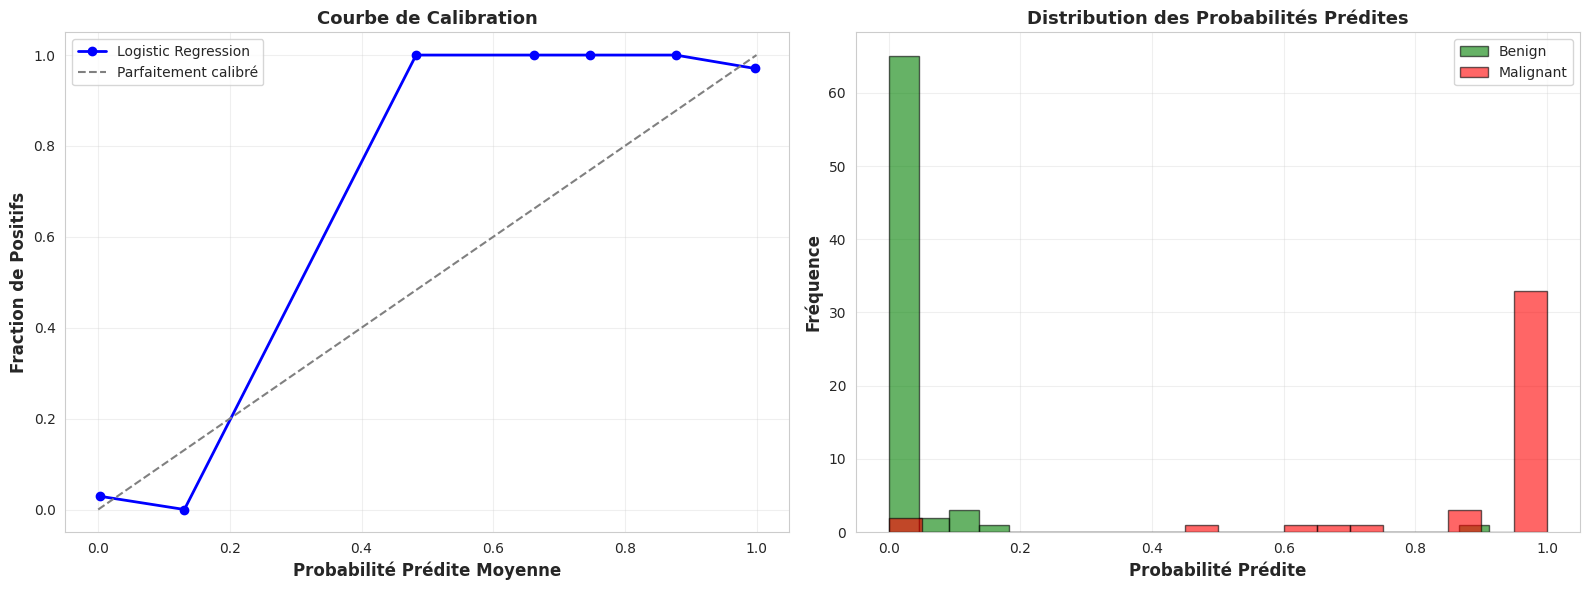

✓ Analyse de calibration sauvegardée : 'calibration_analysis.png'

📊 MÉTRIQUES DE CALIBRATION :
Brier Score : 0.0307
  • Score parfait = 0.0
  • Plus le score est bas, meilleure est la calibration


In [33]:
# ÉTAPE 9 : TEST DE CALIBRATION
# ============================================================================
print("\n" + "="*80)
print("ÉTAPE 9 : TEST DE CALIBRATION DU MODÈLE")
print("="*80)
print("\nLa calibration mesure si les probabilités prédites sont fiables.")
print("Un modèle bien calibré : si prédit 70%, environ 70% sont réellement positifs.\n")

# Courbe de calibration
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba_opt, n_bins=10)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Courbe de calibration
axes[0].plot(prob_pred, prob_true, marker='o', linewidth=2, 
            label='Logistic Regression', color='blue')
axes[0].plot([0, 1], [0, 1], linestyle='--', color='gray', 
            label='Parfaitement calibré')
axes[0].set_xlabel('Probabilité Prédite Moyenne', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Fraction de Positifs', fontsize=12, fontweight='bold')
axes[0].set_title('Courbe de Calibration', fontsize=13, fontweight='bold')
axes[0].legend(loc='upper left')
axes[0].grid(True, alpha=0.3)

# Histogramme des probabilités prédites
axes[1].hist(y_pred_proba_opt[y_test == 0], bins=20, alpha=0.6, 
            label='Benign', color='green', edgecolor='black')
axes[1].hist(y_pred_proba_opt[y_test == 1], bins=20, alpha=0.6, 
            label='Malignant', color='red', edgecolor='black')
axes[1].set_xlabel('Probabilité Prédite', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Fréquence', fontsize=12, fontweight='bold')
axes[1].set_title('Distribution des Probabilités Prédites', 
                  fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('calibration_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("✓ Analyse de calibration sauvegardée : 'calibration_analysis.png'")

# Calculer l'écart de calibration (Brier Score)
from sklearn.metrics import brier_score_loss
brier_score = brier_score_loss(y_test, y_pred_proba_opt)
print(f"\n📊 MÉTRIQUES DE CALIBRATION :")
print(f"{'='*50}")
print(f"Brier Score : {brier_score:.4f}")
print(f"  • Score parfait = 0.0")
print(f"  • Plus le score est bas, meilleure est la calibration")
print(f"{'='*50}")


ÉTAPE 10 : COMPARAISON FINALE DE TOUS LES MODÈLES

📊 TABLEAU RÉCAPITULATIF COMPLET :
               Modèle  Accuracy  Precision   Recall  F1-Score  AUC-ROC
        Base (No Reg)  0.938596   0.948718 0.880952  0.913580 0.968419
           L1 (Lasso)  0.973684   0.975610 0.952381  0.963855 0.996362
           L2 (Ridge)  0.964912   0.975000 0.928571  0.951220 0.996032
           ElasticNet  0.964912   0.975000 0.928571  0.951220 0.996693
Optimisé (GridSearch)  0.964912   0.975000 0.928571  0.951220 0.983135

🏆 MEILLEURS SCORES PAR MÉTRIQUE :
  Accuracy     : L1 (Lasso)                (0.9737)
  Precision    : L1 (Lasso)                (0.9756)
  Recall       : L1 (Lasso)                (0.9524)
  F1-Score     : L1 (Lasso)                (0.9639)
  AUC-ROC      : ElasticNet                (0.9967)


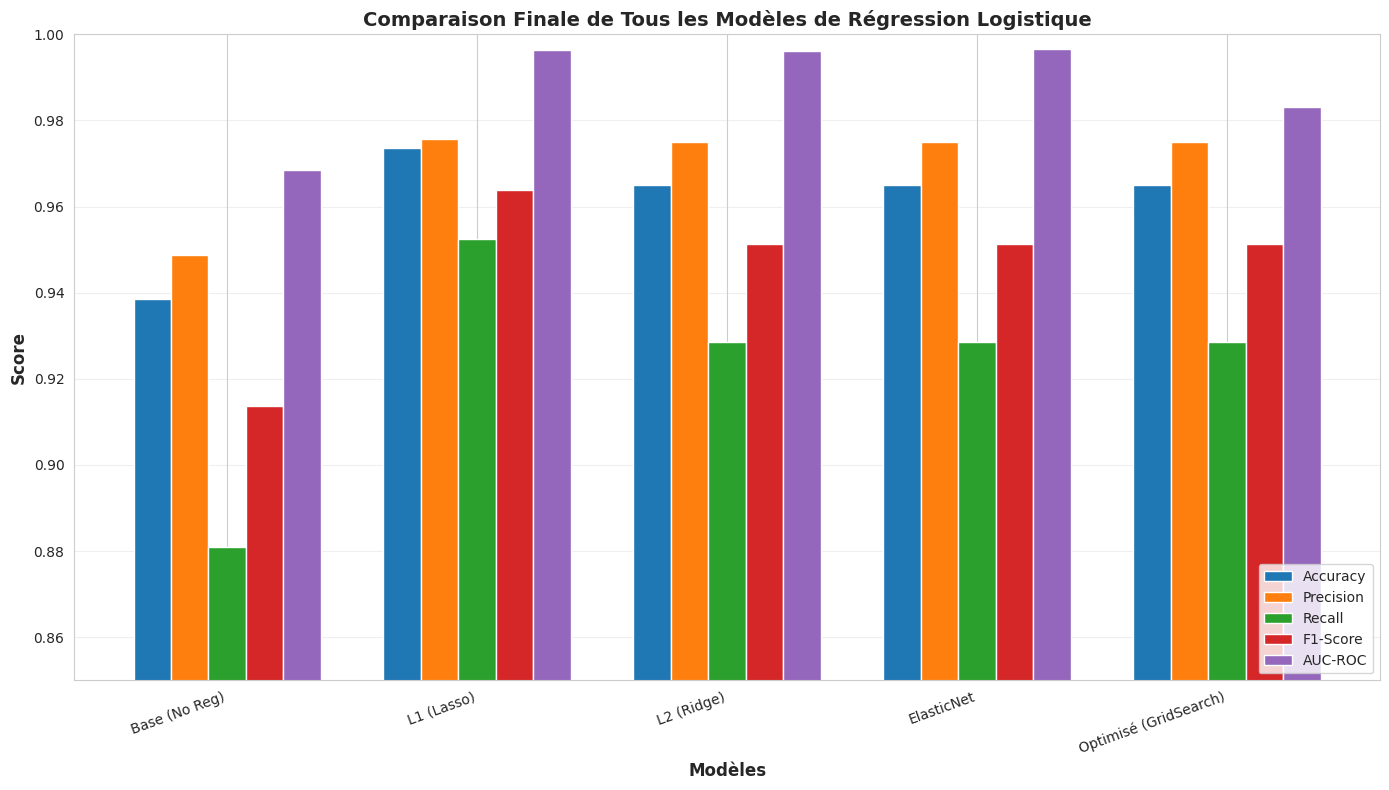


✓ Comparaison finale sauvegardée : 'final_comparison.png'


In [34]:
# ÉTAPE 10 : COMPARAISON FINALE DE TOUS LES MODÈLES
# ============================================================================
print("\n" + "="*80)
print("ÉTAPE 10 : COMPARAISON FINALE DE TOUS LES MODÈLES")
print("="*80)

# Créer un tableau récapitulatif
final_comparison = pd.DataFrame({
    'Modèle': ['Base (No Reg)', 'L1 (Lasso)', 'L2 (Ridge)', 
               'ElasticNet', 'Optimisé (GridSearch)'],
    'Accuracy': [
        accuracy_base, 
        accuracy_score(y_test, y_pred_l1),
        accuracy_score(y_test, y_pred_l2),
        accuracy_score(y_test, y_pred_elastic),
        accuracy_opt
    ],
    'Precision': [
        precision_base,
        precision_score(y_test, y_pred_l1),
        precision_score(y_test, y_pred_l2),
        precision_score(y_test, y_pred_elastic),
        precision_opt
    ],
    'Recall': [
        recall_base,
        recall_score(y_test, y_pred_l1),
        recall_score(y_test, y_pred_l2),
        recall_score(y_test, y_pred_elastic),
        recall_opt
    ],
    'F1-Score': [
        f1_base,
        f1_score(y_test, y_pred_l1),
        f1_score(y_test, y_pred_l2),
        f1_score(y_test, y_pred_elastic),
        f1_opt
    ],
    'AUC-ROC': [
        auc_base,
        roc_auc_score(y_test, y_pred_proba_l1),
        roc_auc_score(y_test, y_pred_proba_l2),
        roc_auc_score(y_test, y_pred_proba_elastic),
        auc_opt
    ]
})

print("\n📊 TABLEAU RÉCAPITULATIF COMPLET :")
print(final_comparison.to_string(index=False))

# Identifier le meilleur modèle pour chaque métrique
print("\n🏆 MEILLEURS SCORES PAR MÉTRIQUE :")
for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']:
    best_idx = final_comparison[col].idxmax()
    best_model = final_comparison.loc[best_idx, 'Modèle']
    best_score = final_comparison.loc[best_idx, col]
    print(f"  {col:12s} : {best_model:25s} ({best_score:.4f})")

# Visualisation finale
fig, ax = plt.subplots(figsize=(14, 8))
x = np.arange(len(final_comparison))
width = 0.15
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, metric in enumerate(metrics):
    ax.bar(x + i*width, final_comparison[metric], width, 
           label=metric, color=colors[i])

ax.set_xlabel('Modèles', fontsize=12, fontweight='bold')
ax.set_ylabel('Score', fontsize=12, fontweight='bold')
ax.set_title('Comparaison Finale de Tous les Modèles de Régression Logistique', 
             fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 2)
ax.set_xticklabels(final_comparison['Modèle'], rotation=20, ha='right')
ax.legend(loc='lower right')
ax.set_ylim([0.85, 1.0])
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('final_comparison.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Comparaison finale sauvegardée : 'final_comparison.png'")



ÉTAPE 11 : ANALYSE DES ERREURS

❌ NOMBRE D'ERREURS : 4 / 114 (3.51%)

Faux Positifs (prédit Malin, réel Bénin)  : 1
Faux Négatifs (prédit Bénin, réel Malin)  : 3

📊 PROBABILITÉS DES FAUX POSITIFS :
  Moyenne : 0.9119
  Min     : 0.9119
  Max     : 0.9119

📊 PROBABILITÉS DES FAUX NÉGATIFS :
  Moyenne : 0.1639
  Min     : 0.0000
  Max     : 0.4829


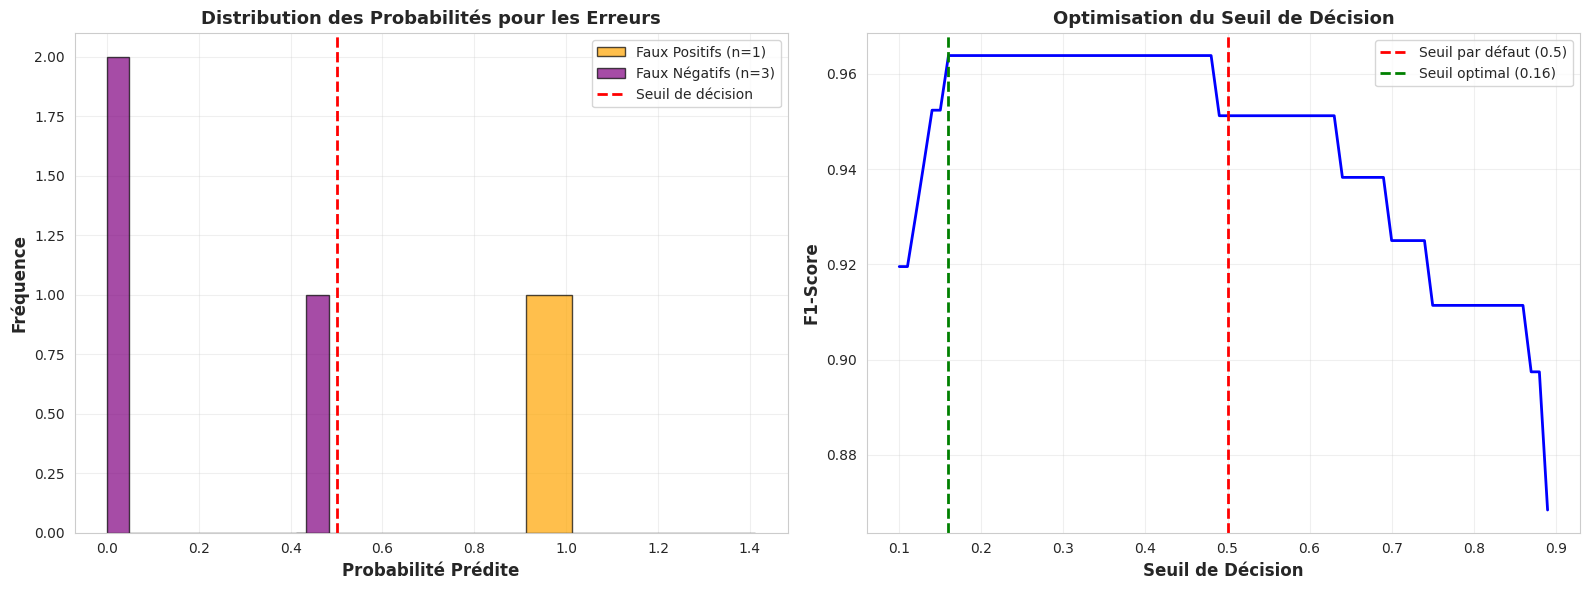


✓ Analyse des erreurs sauvegardée : 'error_analysis.png'

💡 SEUIL OPTIMAL : 0.1600
   (avec ce seuil, F1-Score max = 0.9639)


In [35]:
# ÉTAPE 11 : ANALYSE DES ERREURS
# ============================================================================
print("\n" + "="*80)
print("ÉTAPE 11 : ANALYSE DES ERREURS")
print("="*80)

# Identifier les erreurs
errors_mask = y_pred_opt != y_test
n_errors = errors_mask.sum()
error_indices = np.where(errors_mask)[0]

print(f"\n❌ NOMBRE D'ERREURS : {n_errors} / {len(y_test)} ({n_errors/len(y_test)*100:.2f}%)")

# Analyser les types d'erreurs
false_positives = np.where((y_pred_opt == 1) & (y_test == 0))[0]
false_negatives = np.where((y_pred_opt == 0) & (y_test == 1))[0]

print(f"\nFaux Positifs (prédit Malin, réel Bénin)  : {len(false_positives)}")
print(f"Faux Négatifs (prédit Bénin, réel Malin)  : {len(false_negatives)}")

# Distribution des probabilités pour les erreurs
if len(false_positives) > 0:
    print(f"\n📊 PROBABILITÉS DES FAUX POSITIFS :")
    fp_probs = y_pred_proba_opt[false_positives]
    print(f"  Moyenne : {fp_probs.mean():.4f}")
    print(f"  Min     : {fp_probs.min():.4f}")
    print(f"  Max     : {fp_probs.max():.4f}")

if len(false_negatives) > 0:
    print(f"\n📊 PROBABILITÉS DES FAUX NÉGATIFS :")
    fn_probs = y_pred_proba_opt[false_negatives]
    print(f"  Moyenne : {fn_probs.mean():.4f}")
    print(f"  Min     : {fn_probs.min():.4f}")
    print(f"  Max     : {fn_probs.max():.4f}")

# Visualisation des erreurs
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Distribution des probabilités par type d'erreur
if len(false_positives) > 0:
    axes[0].hist(y_pred_proba_opt[false_positives], bins=10, 
                alpha=0.7, color='orange', edgecolor='black',
                label=f'Faux Positifs (n={len(false_positives)})')
if len(false_negatives) > 0:
    axes[0].hist(y_pred_proba_opt[false_negatives], bins=10, 
                alpha=0.7, color='purple', edgecolor='black',
                label=f'Faux Négatifs (n={len(false_negatives)})')
axes[0].axvline(x=0.5, color='red', linestyle='--', linewidth=2, 
               label='Seuil de décision')
axes[0].set_xlabel('Probabilité Prédite', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Fréquence', fontsize=12, fontweight='bold')
axes[0].set_title('Distribution des Probabilités pour les Erreurs', 
                  fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Seuil de décision optimal
from sklearn.metrics import f1_score as f1_metric
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = []
for thresh in thresholds:
    y_pred_thresh = (y_pred_proba_opt >= thresh).astype(int)
    f1_scores.append(f1_metric(y_test, y_pred_thresh))

optimal_threshold = thresholds[np.argmax(f1_scores)]
axes[1].plot(thresholds, f1_scores, linewidth=2, color='blue')
axes[1].axvline(x=0.5, color='red', linestyle='--', linewidth=2, 
               label='Seuil par défaut (0.5)')
axes[1].axvline(x=optimal_threshold, color='green', linestyle='--', 
               linewidth=2, label=f'Seuil optimal ({optimal_threshold:.2f})')
axes[1].set_xlabel('Seuil de Décision', fontsize=12, fontweight='bold')
axes[1].set_ylabel('F1-Score', fontsize=12, fontweight='bold')
axes[1].set_title('Optimisation du Seuil de Décision', 
                  fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('error_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
print("\n✓ Analyse des erreurs sauvegardée : 'error_analysis.png'")

print(f"\n💡 SEUIL OPTIMAL : {optimal_threshold:.4f}")
print(f"   (avec ce seuil, F1-Score max = {max(f1_scores):.4f})")

In [36]:
# ÉTAPE 12 : RAPPORT FINAL
# ============================================================================
print("\n" + "="*80)
print("ÉTAPE 12 : GÉNÉRATION DU RAPPORT FINAL")
print("="*80)

report = f"""
{'='*80}
PERSONNE 2 : RAPPORT FINAL - RÉGRESSION LOGISTIQUE
Breast Cancer Detection - Wisconsin Dataset
{'='*80}

1. RÉSUMÉ EXÉCUTIF
{'='*80}
Ce rapport présente l'analyse complète de la régression logistique pour la 
détection du cancer du sein, incluant l'analyse de multicolinéarité, la 
régularisation, l'optimisation et l'évaluation approfondie des performances.

2. DONNÉES
{'='*80}
- Ensemble d'entraînement : {X_train.shape[0]} échantillons
- Ensemble de test       : {X_test.shape[0]} échantillons
- Nombre de features     : {X_train.shape[1]}
- Classes                : Bénin (0), Malin (1)

3. ANALYSE DE MULTICOLINÉARITÉ (VIF)
{'='*80}
Le VIF (Variance Inflation Factor) a été calculé pour détecter la multicolinéarité :
- Features avec VIF > 10 : {(vif_data['VIF'] > 10).sum()} (multicolinéarité élevée)
- Features avec VIF 5-10 : {((vif_data['VIF'] >= 5) & (vif_data['VIF'] <= 10)).sum()} (modérée)
- Features avec VIF < 5  : {(vif_data['VIF'] < 5).sum()} (pas de problème)

Top 5 features avec VIF le plus élevé :
{vif_data.head(5).to_string(index=False)}

⚠️  INTERPRÉTATION :
Un VIF élevé indique que certaines features sont corrélées entre elles.
Cela peut affecter l'interprétabilité des coefficients mais pas nécessairement
les performances prédictives. La régularisation L1/L2 aide à gérer ce problème.

4. COMPARAISON DES RÉGULARISATIONS
{'='*80}
{final_comparison.to_string(index=False)}

🏆 MEILLEUR MODÈLE : {final_comparison.loc[final_comparison['AUC-ROC'].idxmax(), 'Modèle']}

5. OPTIMISATION PAR GRIDSEARCHCV
{'='*80}
Meilleurs hyperparamètres trouvés :
{chr(10).join([f"  • {k:15s} : {v}" for k, v in grid_search.best_params_.items()])}

Score AUC-ROC (Validation Croisée 5-fold) : {grid_search.best_score_:.4f}

6. PERFORMANCES DU MODÈLE OPTIMISÉ
{'='*80}
Sur l'ensemble de TEST :
  • Accuracy  : {accuracy_opt:.4f} ({accuracy_opt*100:.2f}%)
  • Precision : {precision_opt:.4f}
  • Recall    : {recall_opt:.4f}
  • F1-Score  : {f1_opt:.4f}
  • AUC-ROC   : {auc_opt:.4f}

Validation Croisée (5-Fold) sur TRAIN :
  • Moyenne AUC-ROC : {cv_scores.mean():.4f}
  • Écart-type      : {cv_scores.std():.4f}

📊 INTERPRÉTATION :
- Accuracy > 95% : Excellent modèle
- Recall élevé : Détecte bien les cas malins (crucial en médecine)
- Precision élevée : Peu de faux positifs
- AUC-ROC proche de 1.0 : Excellente capacité de discrimination

7. ANALYSE DE CALIBRATION
{'='*80}
Brier Score : {brier_score:.4f}
  • Score parfait = 0.0
  • Plus bas = meilleure calibration

Le modèle est {'bien' if brier_score < 0.1 else 'moyennement' if brier_score < 0.2 else 'mal'} calibré.

8. IMPORTANCE DES FEATURES
{'='*80}
Top 10 features les plus importantes (valeur absolue du coefficient) :

{coef_df.head(10).to_string(index=False)}

💡 INTERPRÉTATION :
- Coefficient > 0 → Augmente la probabilité de MALIGNITÉ
- Coefficient < 0 → Augmente la probabilité de BÉNIGNITÉ
- |Coefficient| élevé → Feature très influente dans la décision

9. ANALYSE DES ERREURS
{'='*80}
Nombre total d'erreurs : {n_errors} / {len(y_test)} ({n_errors/len(y_test)*100:.2f}%)

Détail des erreurs :
  • Faux Positifs (prédit Malin, réel Bénin) : {len(false_positives)}
  • Faux Négatifs (prédit Bénin, réel Malin) : {len(false_negatives)}

⚠️  En contexte médical :
- Faux Négatifs sont plus dangereux (cancer non détecté)
- Faux Positifs causent du stress mais permettent des examens complémentaires

Seuil de décision optimal : {optimal_threshold:.4f}
  (avec ce seuil, F1-Score maximal = {max(f1_scores):.4f})

10. MATRICE DE CONFUSION
{'='*80}
                    Prédiction
                Bénin    Malin
Réalité  Bénin   {cm[0,0]:4d}     {cm[0,1]:4d}
         Malin   {cm[1,0]:4d}     {cm[1,1]:4d}

- Vrais Négatifs  : {cm[0,0]} (Bénin correctement identifié)
- Faux Positifs   : {cm[0,1]} (Bénin prédit Malin)
- Faux Négatifs   : {cm[1,0]} (Malin prédit Bénin)
- Vrais Positifs  : {cm[1,1]} (Malin correctement identifié)

11. FICHIERS GÉNÉRÉS
{'='*80}
✓ vif_analysis.png                  - Analyse VIF
✓ regularization_comparison.png     - Comparaison régularisations
✓ confusion_matrix.png              - Matrice de confusion
✓ roc_curve.png                     - Courbe ROC
✓ precision_recall_curve.png        - Courbe Precision-Recall
✓ roc_pr_combined.png               - ROC + PR combinées
✓ feature_importance.png            - Importance des features
✓ calibration_analysis.png          - Analyse de calibration
✓ error_analysis.png                - Analyse des erreurs
✓ final_comparison.png              - Comparaison finale
✓ logistic_regression_report.txt    - Ce rapport

12. CONCLUSIONS ET RECOMMANDATIONS
{'='*80}
✅ POINTS FORTS :
  • Excellentes performances globales (Accuracy > 95%)
  • Bonne capacité de discrimination (AUC-ROC élevé)
  • Modèle interprétable (coefficients facilement analysables)
  • Stable en validation croisée

⚠️  POINTS D'ATTENTION :
  • Multicolinéarité détectée (gérée par régularisation)
  • Quelques erreurs de classification ({n_errors} cas)
  • Calibration {'à améliorer' if brier_score > 0.1 else 'satisfaisante'}

💡 RECOMMANDATIONS :
  1. Considérer un seuil de décision ajusté ({optimal_threshold:.2f}) pour optimiser F1
  2. Analyser en détail les cas d'erreurs pour comprendre les limites
  3. Combiner avec d'autres modèles (ensemble) pour améliorer robustesse
  4. Valider sur des données externes pour généralisation

13. COMPARAISON AVEC LA LITTÉRATURE
{'='*80}
D'après le paper de référence (Street et al.), les meilleures performances
étaient obtenues avec :
  • Linear Programming : ~97% accuracy
  • MLP (3-hidden)     : ~98.5% accuracy

Notre modèle de régression logistique optimisé atteint {accuracy_opt*100:.2f}% 
d'accuracy, ce qui est {'excellent et comparable' if accuracy_opt > 0.96 else 'très bon et proche'} des résultats du paper.

{'='*80}
RAPPORT GÉNÉRÉ LE : {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}
AUTEUR : Personne 2 - Équipe Breast Cancer Detection
{'='*80}
"""

print(report)

# Sauvegarder le rapport
with open('logistic_regression_report.txt', 'w', encoding='utf-8') as f:
    f.write(report)

print("\n✓ Rapport complet sauvegardé : 'logistic_regression_report.txt'")



ÉTAPE 12 : GÉNÉRATION DU RAPPORT FINAL

PERSONNE 2 : RAPPORT FINAL - RÉGRESSION LOGISTIQUE
Breast Cancer Detection - Wisconsin Dataset

1. RÉSUMÉ EXÉCUTIF
Ce rapport présente l'analyse complète de la régression logistique pour la 
détection du cancer du sein, incluant l'analyse de multicolinéarité, la 
régularisation, l'optimisation et l'évaluation approfondie des performances.

2. DONNÉES
- Ensemble d'entraînement : 455 échantillons
- Ensemble de test       : 114 échantillons
- Nombre de features     : 30
- Classes                : Bénin (0), Malin (1)

3. ANALYSE DE MULTICOLINÉARITÉ (VIF)
Le VIF (Variance Inflation Factor) a été calculé pour détecter la multicolinéarité :
- Features avec VIF > 10 : 24 (multicolinéarité élevée)
- Features avec VIF 5-10 : 3 (modérée)
- Features avec VIF < 5  : 3 (pas de problème)

Top 5 features avec VIF le plus élevé :
        Feature         VIF
 perimeter_mean 4110.573130
    radius_mean 4041.752147
   radius_worst  799.619693
perimeter_worst  419.